In [105]:
#!pip install --user -r requirements.txt

In [161]:
import warnings
warnings.filterwarnings("ignore")
import random
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
# Set up TWINT config
import twint
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio

# stopword
import nltk
from nltk.corpus import stopwords
nltk.download("vader_lexicon")
nltk.download('stopwords')
sw_nltk = stopwords.words('english')

import re
text_cleaning_regex = "@S+|https?:S+|http?:S|[^A-Za-z0-9]+"

from keras.models import Sequential
from keras.layers import LSTM,Flatten,Embedding,Dense,Conv2D,MaxPooling2D,Conv1D


# sklearn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc, f1_score,cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# bert
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler, WeightedRandomSampler,random_split
from transformers import BertModel,BertForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer, AdamW, get_linear_schedule_with_warmup


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/swu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/swu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
# check the device
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [108]:
nest_asyncio.apply()
c = twint.Config()
c.Search = "BTC"
c.Lang = "en"
c.Store_pandas = True
# c.Store_csv = True
# c.Output = "test.csv"
c.Since = '2022-02-01'
c.until= '2022-03-01'
c.Min_replies = 20
c.Pandas = True
twint.run.Search(c)

1501259231164571654 2022-03-08 10:11:07 -0800 <whale_alert> 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨  2,528 #BTC (99,898,314 USD) transferred from #Coinbase to unknown wallet   https://t.co/zr1SzBdqN2
1501256851798695936 2022-03-08 10:01:40 -0800 <nftgeekbybone> Dripping 1 $ETH &amp; 0.05 $BTC ---- 11 🏆 Winners  To enter: 1. Retweet &amp; Follow Me 2. Drop Wallet Address 3. Must Join:  https://t.co/W8AzG2WnsR  https://t.co/enMieRhqw7
1501256329855442952 2022-03-08 09:59:35 -0800 <Pentosh1> Would like to see $BTC run all these highs at the minimum  https://t.co/z3MDa4fRDz
1501252551504809984 2022-03-08 09:44:34 -0800 <TurkishPromoter> Alintiladigim twiti like Rt yapan 1 şanslı arkadaşımıza 150₺ verelim. Hızlı sonuçlar için hızlı etkileşim lazım. Bildirim zillerini açmayı unutmayın lütfen. #SHIBARMY #BTC #ETH #doge #Hamstercoin
1501250574842572803 2022-03-08 09:36:43 -0800 <nftgeekbybone> 500$ $BNB ----  🏆 5 Winners  🏆                                                                   To enter:                 

1501202289780002817 2022-03-08 06:24:51 -0800 <ladymarketok> #BTC en modo lateral con posibilidad de terminar un hombro? Veremos las proximas 16hs
1501200783311663106 2022-03-08 06:18:52 -0800 <LukaEvans_> Hey #FAM 🤍 . . Help me finding the best #NFTCollection for 💰 INVEST 10 #BNB ⚡️ . . #BTC  #ETH  #Crypto  #cryptocurrency  #blockchain  #NFTGiveaway #Bitcoin #NFTs #Solana  #NFTCommunity #Metaverse  https://t.co/algGGWSP95
1501200728689639436 2022-03-08 06:18:39 -0800 <SmartCryptoNew1> 💥 @BigONEexchange will support @GXChainGlobal token swap and provide users with exchange services  💥 #BigONE will delist $GXC/ $USDT and $GXC/ $BTC trading pairs at 17:00 on 14th March 2022   🔽 INFO  https://t.co/CgcMK6EnRA #SCN1
1501200519653638149 2022-03-08 06:17:49 -0800 <JohalMiles> The crowd is feeling bearish on March, April, June.  I'm feeling bullish myself. $BTC
1501200453660413954 2022-03-08 06:17:33 -0800 <Bitcoin> Which will #Bitcoin hit first?
1501200385167478785 2022-03-08 06:17:17 -0800 <

1501159754734968834 2022-03-08 03:35:50 -0800 <RackhamRishel> "Your just looking at a 40 year price chart..." No matter how many times this video is posted, it NEVER gets old. ROFL! $HEX $PLS $PLSX #HEX #Gold #PreciousMetals  #BTC #ETH #Crypto #CryptoCurrency #Bitcoin #Ethereum  https://t.co/IHj66VEpKH
1501159091498110982 2022-03-08 03:33:12 -0800 <scottmelker> $BTC  Here is cheat sheet, much important for do trading!   Lines matter, big trades go great well success face!  Follow @scottmelker more tips and trades for life better awesome!  Trade good!  (These are the main areas to watch on the daily chart)  https://t.co/wFT5mnuVzW
1501159041409683458 2022-03-08 03:33:00 -0800 <Nkryztian> GiveAway to my Ladies. Blessing 5 ladies with $10 worth in btc. 1. Follow, like and retweet. 2. Download any of these Wallets using my referal link mentioned below.  3. Comment with you btc wallet when its done ✅  Happy Women’s Day  Sponsored by : #MakryzSpaces #237Cryptonians
1501156509627133955 2022-0

1501135622903377920 2022-03-08 01:59:56 -0800 <CryptoDefiLord> Liquidity BTC brought from investors, NFTs have taking almost all of it and alts can’t see anything to take for its self.
1501135576610840581 2022-03-08 01:59:45 -0800 <scottmelker> 39K every day. $BTC  (Notice I didn't say "all day" and used a different, clever rhyme that would be less triggering for those who cannot handle the emotional strain of words from strangers on the internet. You know who you are.)
1501135101824204803 2022-03-08 01:57:52 -0800 <Dylan13n> When #BTC pumps a little, $VRA pumps a lot!. One day #BTC WILL be &gt; $100k. Will you be going to the moon 🌛 with $VRA ?.   @LLBeer_1 @ShillMe @ayucharlottee @mickreade @LizzieChaplan @Un_Charlatan @GoldSilverMoney
1501132874694766597 2022-03-08 01:49:01 -0800 <UncleNilskij>  https://t.co/xYGMIInplL #staking not even four days old, and look how much has been locked up. That 420% APY boost has gotta be good 👀  #BSC #TheBeastofBSC #eth #btc #cardano #Solana $MONSTA

1501086926304120833 2022-03-07 22:46:26 -0800 <jimtalbot> @siliconebunker the new cope I’m seeing is if btc was going to break down then it would have done it already  https://t.co/yKhX6vDgZf
1501084447076401152 2022-03-07 22:36:35 -0800 <coingecko> TOP-10 Trending Projects in 🇬🇧  $UPI $FLOKIM $GCME #METAPETS $DPR $PKEX $BTC $FTM $ETH $STRONG
1501084076798877696 2022-03-07 22:35:07 -0800 <jhenifa_> Do you know that when it comes to trading your digital assets such as BTC, Steam, Giftcards, etc  Superb Trades is definitely the right plug for you as they are reliable and offer instant payouts.   WhatsApp us now:  https://t.co/yGeY1aVDCr  https://t.co/7bhV1s0yuY
1501083952618131459 2022-03-07 22:34:37 -0800 <crypto_mikee> #Bitcoin düşen kamada sıkışmaya devam ediyor. Güzel bir elmas formasyonu oluşuyor. Bobin bölgesinden kurtulmasıyla yukarı yönlü hareketine devam edecek kama hedefi de gelecektir. Elmas formunu bekliyoruz.  #Btc continues to squeze in falling wedge. A diamond formation is

1501028758584803328 2022-03-07 18:55:18 -0800 <MoonRovingBTC> #NFTGiveway w/ @StargateDAO   Giving away a #Stargate #NFT TONIGHT! 2 $SOL Value🤘  To Enter: 1️⃣Follow @StargateDAO &amp; @MoonRovingBTC 2️⃣RT &amp; Like 3⃣Tag 2 friends, join their discord   On the show tonight! $sol #NFT #SolanaNFTs     https://t.co/3z9OXdVDal
1501027839260254216 2022-03-07 18:51:39 -0800 <CredibleCrypto> Nothing has changed since this chart shared two days ago. Almost to the red box 👀 $BTC
1501026811517579271 2022-03-07 18:47:34 -0800 <TechDev_52> 4H #BTC shaded volatility squeeze off a reversal bar with tightening bands. Indicators by @Tradingalpha_ @ZeroHedge_ .  Interesting LTF move likely ahead.  https://t.co/la4kHOBaWd
1501026475578990596 2022-03-07 18:46:14 -0800 <Chubbicorn219> When I buy now I just barrel into eth, btc, and avax.   Not sure what the other 8000 tokens are even for tbh
1501025821615484934 2022-03-07 18:43:38 -0800 <tedtalksmacro> If #BTC were to test $20K, the last 3 months have bee

1500988553676918786 2022-03-07 16:15:32 -0800 <cryptobcncat> Todos los mercados tradicionales caen en picado (S&amp;P 500 un 3%, NASDAQ un 3.6%, Dow Jones casi un 2.5%…), y #Bitcoin está en 38k, al mismo precio de ayer 🙀  $BTC está más fuerte de lo que muchos creían 😼
1500986584727969793 2022-03-07 16:07:43 -0800 <jevauniedaye> Look at this monthly candle... all I see is incoming pain for bulls.  $BTC  https://t.co/TOCweuNOOO
1500985890155503618 2022-03-07 16:04:57 -0800 <SaitamaUniverse> #Saitama, may the wind always be on your back and the sun upon your face and may the winds of destiny carry you aloft to dance with the stars. #SaitaMask   #SaitamaWolfPack #crypto #cryptocurrency #cryptotrading #cryptos #x100gem #x1000gem #DeFi #btc #eth #nft #Binance #Bitcoin  https://t.co/IXSOlxuCKk
1500984913247547407 2022-03-07 16:01:04 -0800 <_CryptoKush_> Some Big Accounts/ Influencers are busy discussing about Bitcoin, Bull or Bear   And How Alts are down this or That much and making fun of no

1500951103323652097 2022-03-07 13:46:44 -0800 <AurelienOhayon> #BTC Consolidation is over.  Fractal target : $1.8M  Disclaimer : A fractal's probability of realization is statistical, just as the simpler chartist figures (triangles, wedges, channels), which are low-complexity fractals. Furthermore, a rise in capitalization slows down time.  https://t.co/EGkv0EoNUT
1500949364738568195 2022-03-07 13:39:49 -0800 <CoinDesk> MARKET WRAP: Bitcoin $BTC traded lower along with stocks, while oil prices spiked. Analysts expect cryptos will stabilize within two or three months.  https://t.co/Lh7yS3Xyti
1500948473675276290 2022-03-07 13:36:17 -0800 <ethbabesnft> ❤️‍🔥Minting a Babes gives you the chance to be one of the winners splitting .69 BTC or one of the winers splitting 69 ETH.   💸Then, stake your babe and enjoy 50% of royalties paid out passively, forever.   💸Oh, did we mention there is P2E game too?    https://t.co/o8bCFKz1TO  https://t.co/viO8mpLmFM
1500947273567686656 2022-03-07 13:31:30 

1500928261039271938 2022-03-07 12:15:57 -0800 <CryptoWizardd> Many of u are emotional invested.  No worries we all know where #btc is heading in the longterm  Il be around here if God allows
1500927839478157319 2022-03-07 12:14:17 -0800 <ZubattNFT> Doing another #BTC   giveaway!  I’m going to give away $100 worth of #BTC  to one lucky winner   To enter just follow me tag a friend  and retweet this tweet!   winner being announced in 24 hours good luck :) #cryptogiveaway
1500927024378089476 2022-03-07 12:11:03 -0800 <Coinmatik1> #ABD Virginia Senatosu, bankaların #Bitcoin ve #crypto saklama hizmetleri sunmasına izin veren bir yasa tasarısını onayladı.  #BTC #ETH #Metaverse #NFTs
1500926917930885123 2022-03-07 12:10:37 -0800 <mullymt> @STEVEN_HALL_bTC @DMokryk Afghanistan was a defensive action that the entire world supported. Iraq was a mistake, but Saddam's regime weren't exactly the good guys.
1500926676758241283 2022-03-07 12:09:40 -0800 <kingjimmyc> I did my best this last year givin

1500895278370590728 2022-03-07 10:04:54 -0800 <easyeight08> IT'S 99% #BEARMARKET FUCK THIS #BTC
1500894559202590728 2022-03-07 10:02:02 -0800 <bitgetglobal> Are you ready to spend a $BTC holiday in El Salvador? 🇸🇻  https://t.co/hLWI2Y3Q2c
1500894018124894210 2022-03-07 09:59:53 -0800 <MultiVAC_Global> $MTV 🚀 #MultiVAC the future of #blockchain  #crypto #cryptocurrencies #cryptocurrency #defi #nft #btc #eth #bridge
1500893669540388866 2022-03-07 09:58:30 -0800 <LadyofCrypto1> Which #crypto, aside from $BTC and $ETH, do you think will survive the next bear market and come back stronger?
1500893570399719427 2022-03-07 09:58:07 -0800 <Crypmx0> #Concours Tentez de gagner ce NFT BORED APE ! D’une valeur de 1 BTC (soit 34 526,73$)   Pour participer : RT + Follow   Tirage au sort dans une semaine !  https://t.co/RO20kpCzAZ
1500893541802860545 2022-03-07 09:58:00 -0800 <Crypto__Goku> Les NFT sont ___________  Remplissez le blanc🤔  #NFT #Metaverse #NFTs #NFTCommunity #nftcollector #Crypto #nftco

1500874523205423109 2022-03-07 08:42:25 -0800 <PARABOLIT> Long $BTC $39,050
1500873403951165448 2022-03-07 08:37:59 -0800 <NetAnalist> #TROY  dipten  % +120 oldu yukarda tutunuyor  #MBL  +200 üzerinde tutunuyor   Altlarda dönüşler en az bu şekilde devam edecektir  #BTC nin   37.500 üzerinde kalması yeterli olacaktır  https://t.co/rkUbBkTqqR
1500873352302366723 2022-03-07 08:37:46 -0800 <profit8lue> I felt like sharing this... This is how I actually do analysis when I'm managing a big trade manually as price goes. AND yes this is the 1 min time frame...... #btc  https://t.co/K7Upi8ICxh
1500872640944300034 2022-03-07 08:34:57 -0800 <topsathletic> #altcoins WILL PUMP SOON LIKE NEVER BEFORE GET READY 🚀🚀🚀 #BTC💎 #SHIB 🚀 #SHINJA 🚀
1500871855506436098 2022-03-07 08:31:49 -0800 <BartBaker> @Ralvero Now - @ParmaToken going 100x this week with the #bsc crosschain launch &amp; Miami beachfront marketing (not financial advice DYOFR) Parma is a safer investment than #BTC  at this point ☝️  https://t

1500848591807696901 2022-03-07 06:59:23 -0800 <monicataher> De las empresas que han venido a situarse en #ElSalvador por el #Bitcoin , sobresaldrán aquellas que ejecuten estrategias de Responsabilidad Social Corporativa (CSR), las que ayuden a la reconstrucción del país, las que ayuden a nuestra gente - y no sólo hagan negocios. #BTC  https://t.co/6sb4c5v236
1500847997126598660 2022-03-07 06:57:01 -0800 <ave_eli> OK frens, when it comes to $BTC and crypto sometimes you may not like what I tell you, or you might not like the way I say things, but I have never lied to you, tricked you, or sold you false hopes. I have tried my very best to keep you on the winning side.
1500847539414876161 2022-03-07 06:55:12 -0800 <zeynepdenbiri> #AVAX   Yakın desteğimiz 72.5$’dır ve üzerinde kırmızı kutuya kadar alım beklerim.  Gri box üzeri günlük kapanış işe alıcılar iştah açabilirler.  Kırmızı kutu geçilmez ise tekrar 72.5$ hedefte olabilir.  #BTC #kriptopara  https://t.co/G1OEHCyiIo
15008473501342801

1500824806219988994 2022-03-07 05:24:52 -0800 <JohalMiles> Note that so far we have been making consistent higher lows and yet sentiment gets worse and worse as if we were making lower lows.  One cannot deny that the bearish contagion here is similar to that which was bullish at 69k. $BTC  https://t.co/ElzP5hKPIB
1500824392711950343 2022-03-07 05:23:13 -0800 <TheTradingHubb> BULL vs BEAR options.   Again, there's so much uncertainty here from a technical standpoint &amp; on top of that you have unprecedented real world risks.   So for me there's no big long term trade here yet.   Just a matter of being patient &amp; invalidating some of these counts.   $BTC  https://t.co/cV0ILF0pci
1500823724014149634 2022-03-07 05:20:34 -0800 <saraharrisons> I have 5 #ETH to invest in some #NFTs 🚀🚀  Drop me your gems 💯  #NFTCommunity #NFTCollection #GameFi #Solana   #BNB   #BTC   #TRON   #Metaverse
1500822337129750533 2022-03-07 05:15:03 -0800 <gate_io> Apple Co-Founder Steve Wozniak Calls #BTC Pure G

1500797218235822083 2022-03-07 03:35:14 -0800 <Anbessa100> #BTC LTF Update   🔹Key trendline support $37777 retest  🔹bullish divergence target at least  $40,3k  https://t.co/YV0xrz395R
1500796882762747913 2022-03-07 03:33:54 -0800 <healthy_pockets> ~El #BITCOIN está mostrando su poder de Descentralización al mundo~  Forbes #BTC
1500796510799282177 2022-03-07 03:32:26 -0800 <BTCTN> “The Fed has been terribly wrong over the last year ... All this temporary inflation,” said the professor. #crypto #cryptocurrency #bitcoin $BTC  https://t.co/SBAR0EtUsQ
1500794487387394049 2022-03-07 03:24:23 -0800 <CryptoGemFinds> Signs are showing that $BTC whales are continuing to accumulate more stablecoin to purchase BTC during the dip amid decreasing supply.  Seems as though we're Bearish in the short term and Bullish in the long term. #Bitcoin #Cryptocurrency  https://t.co/BbfyGNp3uo
1500793558655242242 2022-03-07 03:20:42 -0800 <RTRcrypto> If you thought the king of DeFi was #FTM or the founders, you'

1500766555302514688 2022-03-07 01:33:24 -0800 <BTCTN> “We've got some work to do here from a regulatory perspective. We got to get the markets to calm down a little bit,” said the Skybridge Capital foudner. #crypto #cryptocurrency #bitcoin $BTC  https://t.co/iVxbBhFryx
1500765581049540611 2022-03-07 01:29:32 -0800 <whale_alert> 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨  3,500 #BTC (134,073,786 USD) transferred from #Binance to #Bitstamp   https://t.co/37Er04xp6o
1500765163665960961 2022-03-07 01:27:52 -0800 <gguoss> Great, my #web3 contribution is already:  $BTC + $ETH + $Mini.  Efforts to pursue the arrival of the #moon  https://t.co/zXmOQwqdTW
1500764819708051459 2022-03-07 01:26:30 -0800 <VegetaCrypto1> wt if? #BTC  https://t.co/wt2DB4HboN
1500764056847802368 2022-03-07 01:23:28 -0800 <cryptoo_kingg> 💥0.5 #AVAX  💥1 NorthPark 🔺#NFT  🎉 #Giveaway 🎉   ✅Follow @cryptoo_kingg &amp; @xyz_NorthPark  ✅Rt &amp; ♥️   ✅Tag 3 friends ⏳72 hours!   https://t.co/Of2H5XswoE 🔗 https://t.co/tBguC1q8fk  #Avalanche #BTC #ETH

1500743722694287360 2022-03-07 00:02:40 -0800 <DonCryptoDraper> $BTC hate these full retracements. but could have been worse.  The pump is always out there  https://t.co/vGPuSsNP54
1500743661503782912 2022-03-07 00:02:26 -0800 <cryptocom> 2 weeks left: #BTC Supercharger 10x Booster Bonus 🚀   🔥 USD 2M reward allocation 💰 Stake $CRO &amp; earn $BTC ⭐ Chance to receive up to 52% p.a.   Remember, 88 lucky participants will win a “Supercharger Booster” NFT that grants a 10x rewards boost!   👉  https://t.co/NAWdFIhzvT  https://t.co/FxyLDLEpWq
1500743054403198976 2022-03-07 00:00:01 -0800 <Poloniex> Welcome to join the UP&amp;DOWN event 🚀 Choose UP if you think $BTC will be above $39,000 DOWN: the price will be below $37,000 at 04:00 UTC on Mar. 11   1⃣ Retweet 2⃣ Tag 3 friends 3⃣ Comment UP or DOWN  10 Winners will be picked to share $50 USDT Answers before 04:00 UTC on Mar.11  https://t.co/wVcHtyNE7t
1500739294163615746 2022-03-06 23:45:04 -0800 <gate_io> 🔥#Gateio Structured Products   Dail

1500703187602493440 2022-03-06 21:21:36 -0800 <MMCrypto> #BTC BART COMPLETED..  https://t.co/OzUypsnjYq
1500700083112722434 2022-03-06 21:09:16 -0800 <terraformersapp> Daily giveaways are drawn for on the next AMA stream on March 9th. Thalassic Booster Pack mint will be available on March 7th, 18:00 UTC.  "Morphing Waters"   1. Like, retweet &amp; follow 2. Comment your Wax wallet and @ three friends 3. Join our Discord  #wax #nft #p2e #btc #eth  https://t.co/aDg1CgraeO
1500698837928787972 2022-03-06 21:04:19 -0800 <RaindropCrypto> Sabah uyandığımda #btc grafiğine bakışım.İyi haftalar diliyorum herkese 🤍  https://t.co/MBKyT1Opwj
1500698098473000964 2022-03-06 21:01:22 -0800 <alrawenet> الرقم القادم للـ #Bitcoin  #BTC 36550$
1500697806331203588 2022-03-06 21:00:13 -0800 <_1heisenberg10_> @9Sigma1 @inversebrah @timot78 @RetirementRight I think he is right though, I have been trading crypto for many years and went through numerous emotional swings with BTC but at the same time am not afra

1500664969796497408 2022-03-06 18:49:44 -0800 <XaRizteyrehPes> Beta Test Coin $BTC Xtremely Rapid Payments $XRP Elaborate Trendy Hoax $ETH
1500664804947546114 2022-03-06 18:49:05 -0800 <Atlantis_Ex> Will #BTC cross $45k Mark by the end of March ? Comment your views.  1 Random person who Follow, like , Retweet and comment in this tweet will be Rewarded $50 USDT.  🎁🎁🎁🎁🎁
1500663893294821378 2022-03-06 18:45:27 -0800 <AwyeeDeaterBob> $BTC  https://t.co/jIc8qnU6lL
1500663424501489665 2022-03-06 18:43:36 -0800 <InspireAndOpp> @SpencerKSchiff @APompliano @PeterSchiff If you think $BTC is going higher, in the long run, you are surely miss informed. Mass adoption does not make $BTC more valuable in price. As you can see, the more it is adopted, the lower the price is going to go. Think of it has a computer in the 1980 and 90's.
1500661891596800002 2022-03-06 18:37:30 -0800 <OnChainCollege> 75.8% of the #Bitcoin supply has not moved in at least 6 months.  Supply Last Active: 🟣 6 months - 2 years

1500630252824895491 2022-03-06 16:31:47 -0800 <Xposed> Bots copying and pasting there BTC address on all of my tweets lmao. You’re easy reads pisscans.
1500629184409911302 2022-03-06 16:27:32 -0800 <cryptopopara> The only thing that's looking worse than $BTC weekly close is..  $LTC / $BTC weekly close heheh..  https://t.co/wsqAlT9t6J
1500628129852928000 2022-03-06 16:23:21 -0800 <crypto_birb> Last time I recall $BTC was stuck in extreme fear sentiment for so long was December 2018 - April 2019. It’s testing patience big time  https://t.co/AIe1WkObeB
1500627573939658753 2022-03-06 16:21:08 -0800 <ThinkingBitmex> BTC specifically has supply demand dynamics which don’t operate exactly the same as bonds, stocks, real estate, or altcoins
1500627206074421253 2022-03-06 16:19:40 -0800 <teslaeconomist> I am starting to feel like fiat currencies are a ticking time bomb. Every country on earth will now be scrambling to find a Plan B because they too can get cancelled from the global financial sy

1500607184668930049 2022-03-06 15:00:07 -0800 <ChartingBot> 📈Analysis March 06th📈  The current price of $BTC is 38939.48$ (🔻-1.35%), and its dominance is 42.78%.   The market sentiment is at 22 points [💀Extreme Fear].   Total #crypto market cap is 💰1.73 trillion $💰 approx.  #bitcoin  https://t.co/Qk9d62HUl0
1500607182722715656 2022-03-06 15:00:06 -0800 <PenguinOffisial> Pretty sure we are going to see a blow off top soon. Parabolic crypto gains are ahead. Stay patient and HODL. $BTC $LTC $XLM $ZIL $CLV $NKN $BRY $ZWAP
1500605956203364353 2022-03-06 14:55:14 -0800 <edactoken> #EDAC start mining power‼️  🔗  https://t.co/2ljjTptysn  #altcoin #cryptocurrency #edactoken #mining #eth #bitcoin #BTC  https://t.co/XcoIqQXVBB
1500605946158006272 2022-03-06 14:55:12 -0800 <blockchainshay> SHILL ME SOME GEMS AND NFTS 👇   $BTC $ETH $NFT #NFT #OPENSEA #POLYGON  https://t.co/Tq0UYOM96B
1500604971506614273 2022-03-06 14:51:19 -0800 <TheCryptoDog> How about we sell all of our altcoins into BTC.  The pr

1500570397841973256 2022-03-06 12:33:56 -0800 <TheLondonCrypto> In my opinion $BTC goes to $100k this year.   $VRA to at least 50 cents.  DYOR
1500570153381154832 2022-03-06 12:32:58 -0800 <X__Anderson> They used to claim $XRP army was a bunch of bots but nothing resembles bots more than the Bitcoin maxis who tell you to buy Bitcoin at all times.  - It’s a war, bullish for BTC: Buy Bitcoin. - Market is down: Buy Bitcoin. - Market is up: Buy Bitcoin.  Are these real people?
1500569212204556290 2022-03-06 12:29:14 -0800 <mamadporii> من به عنوان یه طرفدار دو آتیشه #بیتکوین که اصلأ به خاطر آنارشیستی بودن بیتکوین بهش علاقه‌مند شدم الان برام سواله که اگه جای دلار را در مناسبات جهانی بیتکوین گرفته بود چی میتونست جلوی جاه‌طلبی و کشورگشایی پوتین رو بگیره؟! دارم بهش فکر میکنم جوابش رو نمی‌دونم #btc
1500568483041619979 2022-03-06 12:26:20 -0800 <MetaverseToken1> Follow me and Shill me some undervalued gems with less than $10 Million Market Cap 👇  Wanna Ape🦍  #AVAX #BUSD #BNb #BTC #TRX
15005683592

1500526139739185159 2022-03-06 09:38:04 -0800 <ProjectEuropa_> Did somebody say WL? On a weekend... For playing a video game? 🎮  If you want a shot yourself, come and join the fun... Link in Discord!  We are also looking for players to start league teams in:  Vanguard Apex More 👀  #GameFi #NFTs #Gaming #Twitchtv #eth #btc #Crypto  https://t.co/zXvsMIeVb2
1500524833238626305 2022-03-06 09:32:53 -0800 <AurelienOhayon> #BTC is ready.   Fractal target : $340K.  https://t.co/UKKvTe1YyX
1500522111273689090 2022-03-06 09:22:04 -0800 <PiiSaG0R> #Bitcoin yüzünden bankam beni fakir sanıyor   #BTCUSD #BTC
1500522109935706119 2022-03-06 09:22:04 -0800 <CryptoSM8> Un trader necesita:  1. La mente de un matemático.   2. Los nervios de un cirujano.   3. La resistencia de un atleta.   4. La tolerancia al riesgo de un empresario.  #BTC
1500521982084931586 2022-03-06 09:21:33 -0800 <denizrmak> Yükselişten önce son fırsatlar.#btc #altcoins
1500521886043848706 2022-03-06 09:21:10 -0800 <CryptoTony__> $BTC

1500490349147480064 2022-03-06 07:15:51 -0800 <borsaressami> #chz önce Long dedik geldi, sonra short dedik oda geldi ☺️ #btc  https://t.co/2EXiYmThnP
1500488574692646919 2022-03-06 07:08:48 -0800 <AurelienOhayon> #BTC Ascending triangle after a falling wedge breakout.  Final target : $68K.  https://t.co/Bfw8lSiGtS
1500488487199559690 2022-03-06 07:08:27 -0800 <borsaressami> #btc kısa zamanda tekrarda koyu alan üzerine atarak orada bir gün kapanışı yapmadığı sürece fiyat aşağıdaki bölgeleri almak isteyecektir diye düşünüyorum. Yani işlem açmakta özelliklede long açmakta pek aceleci olmama taraftarıyım.  https://t.co/r4pKXEwibW
1500488277484347393 2022-03-06 07:07:37 -0800 <Kriptozenciii> Benim için kritik bölge ılan 37.500 hala kırılmış değil bundan dolayıda moralimi bozmuyorum. Eski twitlerimdede söylediğim gibi doğru noktadan aldığımı düşündüğüm çok coinim var ve panik yapacağım bir durum olduğunu düşünmüyorum. Bu benim kendi stratejimdir. #bitcoin #btc
1500487807332196355 2022-03-06 

1500456320201379840 2022-03-06 05:00:38 -0800 <ChiefraFba> 🚨🎁 $1000 GIVEAWAY 🎁🚨  Win $1000 worth of coins from ONE of your choice of:  $FTM $BTC $BNB $AVAX  TO ENTER:  🔶 Like this post 🔶 Follow me 🔶 RT this post 🔶 Tag 1 friend 🔶 Join our free Telegram (link in bio)  ⏰ Winner announced 24 hours from this tweet.  Good Luck 🤝
1500456273963216896 2022-03-06 05:00:27 -0800 <AoiBtc> ぜひ私のスペースに参加してください！  https://t.co/VGcm9cmvfu
1500455699502940165 2022-03-06 04:58:10 -0800 <bbmelike> Toparlan #BTC
1500454975318679562 2022-03-06 04:55:17 -0800 <RealYoyowbu> 15 tanede Kucoinden aldım. 65 tane #BTC alım yaptım. 100’e tamamlayacak mıyım acaba? İzlemedeyim.  https://t.co/QGPC549eQb
1500454793512427521 2022-03-06 04:54:34 -0800 <Ekoanalizz> #BTC FUTURES VE SPOT SİNYALLER   #binance  https://t.co/3UFajuX9L5
1500454162491973632 2022-03-06 04:52:04 -0800 <RealYoyowbu> Herkese selamlar, alımlara başladım. 38150’den 30  38470’den 20 BTC, toplamda 50 BTC alım gerçekleştirdim.  Birazda Kucoin’den alacağım.

1500423781768392704 2022-03-06 02:51:20 -0800 <BTC521> 我来翻译一下，熊市来了，韭菜们没有钱了，老子割韭菜已经暴富了，不陪你们这群沙雕韭菜玩了……  机构割韭菜发项目毫无下限，钱赚够了直接不要了，留下韭菜默默流泪，很难解套了…… #BTC #Bitcoin #ETH #NFTs  https://t.co/mFtI6TrH6l
1500423547612766210 2022-03-06 02:50:24 -0800 <AltcoinGordon> The #BTC weekly candle looks worse than my ex wife
1500423369392599041 2022-03-06 02:49:42 -0800 <iCiervoKing> If you are a #Crypto trader @EQONEX is for you!💯  One of the safest #cryptoexchange in the market with a solid product suite including its latest addition: $BTC Dated Futures😍   Welcome bonus up to $150 up for grabs, just deposit and start trading here:  https://t.co/l4XsiMgLxx  https://t.co/eKXv1bVn7t
1500421458102784000 2022-03-06 02:42:06 -0800 <crypto_birb> $BTC down days be like  https://t.co/WpE6nw0YcE
1500421211779907584 2022-03-06 02:41:08 -0800 <deficryptofarm> It’s a shame all this Anton Andre fud came out same time as #btc dipping, that way we can’t tell how much of this dip is related to btc or the fud.
150042099371

1500385500171223040 2022-03-06 00:19:13 -0800 <haxgee1> #NFTGiveaways  To win you need to: ✅Follow me ✅Retweet  ✅Tag 1 friend   500usd up for grabs!   DM FOR PROMOS  Good luck! Winners will be announce in 24 hours! #NFTGiveaway #NFTGiveaways #BTCUSDT #Ethereum #nfts #nft #solana #BTC
1500385312652025862 2022-03-06 00:18:29 -0800 <Medicaljane__> Full grown man but you need to sell btc before you pay 10,000naira???? I’m so disgusted &amp; pissed off
1500383159162077186 2022-03-06 00:09:55 -0800 <english_foolery> Incoming Hyperburn, utilities, educational, financial freedom…. #Saitama #SaitaMask why wouldn’t you…….🐺❤️‍🔥💯🔥🔥🔥 #cryptotrading #trending #Binance #wolfpack #BTC #SaitaReality  https://t.co/IXpsZc1Z2e
1500382665949777922 2022-03-06 00:07:57 -0800 <OrijinHQ> What if we launched our own Orijin #NFT?   To reward our early supporters - like if you’d be interested 👇🏼   https://t.co/i2sDVYTca7   #Orijin #Polygon #IDO #BSC #Eth #BTC #Airdrop #DeFi #Launchpad  https://t.co/UBfTTY9CgM
150

1500311672224989185 2022-03-05 19:25:51 -0800 <PsychedelicBart> Did you notice how Crypto Twitter didn't mention ETH for uncensorable money?   When shit hits the fan, they stop with their lies/bullshit and recognize that only #BTC matters in uncertainty.
1500309185472434176 2022-03-05 19:15:58 -0800 <ShibBender> 0.5 BTC get you about 800M $SHIB #ShibArmy
1500308592737624066 2022-03-05 19:13:37 -0800 <TheCryptoGifter> I'll help pay your bills, drop your $BTC wallets! 💎 Helping 12 People with $5000 each in #BTC   💗
1500307942158966785 2022-03-05 19:11:02 -0800 <ThinkingBitmex> 0.5 BTC before 0.69 BTC  Few…..
1500307611543117831 2022-03-05 19:09:43 -0800 <TheCryptoGifter> Drop your $BTC address 👇  I will send you $2000❤
1500303758198145026 2022-03-05 18:54:24 -0800 <thelegendrace> [Minigame] Let's predict BTC/USDT price on  https://t.co/09QIY5mLc8 at 03:00 UTC on March 7, 2022  Conditions: 1. Share this post, tag 3 people with the hashtag #minigameTLR #thelegendaryrace 2. Join Telegram gr

1500269354281312259 2022-03-05 16:37:42 -0800 <LABRAHODL20> 0.5 #BTC IS BETA, AIM 6.15
1500268003069419524 2022-03-05 16:32:20 -0800 <dio_ianakiara> I like to play the long term game. So, I will give away 10,000,000 $KLV to 1,000 random followers when I reach 1M followers.   ❤️  Just Like, RT, follow me and @klever_io  🔔  Tag your #crypto friends + #KLV &amp; #ETH &amp; #BTC &amp; #Bitcoin   May the force be with you 👊 #Klever
1500267950040879105 2022-03-05 16:32:07 -0800 <BTCTN> “The good news is they are all over it and agree there is tremendous opportunity once they pass policy. Stay tuned, I left them feeling optimistic.” #crypto #cryptocurrency #bitcoin $BTC  https://t.co/AM3NRtJkHT
1500266263351857154 2022-03-05 16:25:25 -0800 <ERLNFT> I’m giving away this @AntonymNFT NFT to 1 lucky person to follow the rules below, the winner will be announced in 24hrs ⏰   1. Like + RT 2. Follow us &amp; @SourNFT  3. Tag 3 people below 👇   #NFTGiveaway #NFTGiveaways #ETH #BTC #SOL #nftart #NFTPr

1500235976442011660 2022-03-05 14:25:04 -0800 <XRPayNet> How many millions of businesses do you think will accept crypto payment if they can receive fiat currency INSTANTLY?  #cryptonews #crypto #xrpaynet #followus #fiatcurrency #xrp #btc #btcnews #xrpl #cryptocurrencynews  https://t.co/cIk7c39JRU
1500235801745145858 2022-03-05 14:24:22 -0800 <TheCryptoGifter> We're 48 #FOLLOWERS away from 1700 total!  If we can hit 1700 before I go to bed tonight, I'll be giving $10,000 to 5 people! 🤑  Don't miss your chance!  Like ❤️ RT  Follow me 💎 Tag 5 people 🏷   #ONE #ADA #BTC #VET #VRA #SHIBA #LINK #BNB #TEL #FEG #SOL #MTV #ETH #DOGE #NFT
1500234674832039948 2022-03-05 14:19:54 -0800 <Xposed> When @ColbyCovMMA wins tonight I’ll be giving 10 People who retweet this and is following me @Xposed $250.   #mma #ufc #UFC272 #CovingtonvsMasvidal #giveaway #Masvidal #Covington #btc #bitcoin #ETH #crypto  https://t.co/oD9fQx3Bwl
1500234042037481480 2022-03-05 14:17:23 -0800 <ParadigmaEdu> A Bíblia é, aleg

1500198838107357188 2022-03-05 11:57:30 -0800 <CardanoApps> There are only two Non-VC owned and fair #cryptocurrency in the world:  1. #Bitcoin $btc and 2. #Cardano $ada  Prove me wrong ✍️👇
1500197865255321600 2022-03-05 11:53:38 -0800 <_borutoKING> #MarvinInu team are fully Doxed and Experienced☎️☎️  $Marvin community is very infective to new members to becoming hyped🔥🔥  @Marvin_inu potential is #1000xgem 🔥🔥  @DelCrxpto @RealFlokiInu   #BSCGemAlert #ETH #NFT #BTC #BNB  https://t.co/yCwTUm5KM6
1500197350685528068 2022-03-05 11:51:35 -0800 <SoufianeYakuza> What a beautiful chart I fall in love with it 💚💚💚💚🤑🚀🚀🚀🚀 @terareum @FirstSmart4 @RDPrice #Terareum @elonmusk @BTC_Archive  https://t.co/4h7dWLK0Dl
1500196464374554631 2022-03-05 11:48:04 -0800 <hariboplayss> I am bullish right now....  So shall I post a giveaway?   #BTC  #BNB #ETH  #Solana
1500196183582511106 2022-03-05 11:46:57 -0800 <_bitcoiner> reply with a lightning address and i'll send 77 sats to it 👇👇👇  ▹ no invoice or qr code, 

1500157324207525893 2022-03-05 09:12:32 -0800 <ladymarketok> Estaba viendo todos estos indicadores y les digo que va a subir #BTC , vaa, creo.. Por ahi tambien baja ... Aunque pensandolo bien puede ir lateral jajaja  https://t.co/ral4yKhn4n
1500156664850354178 2022-03-05 09:09:55 -0800 <stephenchip> I recommend XRP over ETH and BTC.   With that said, at least BTC doesn’t have ridiculously high gas fees.   That alone would eliminate ETH.   But don’t worry.   ETH 2.0 should be out in another six years.
1500155613925543939 2022-03-05 09:05:44 -0800 <JaWo1245> $Marvin is the #coin of the moment   #MarvinInu the crypto king is here  All other #memecoins are bowing to rheir king @Marvin_Inu  #Marvin #BNB #ETH #BTC #FLOKI  https://t.co/h0pYIf6n25
1500155469721223168 2022-03-05 09:05:10 -0800 <borsaressami> #CHZ   #Btc biraz daha buralarda oyalanırsa düşüş yaşamadan CHZ sıralı hedefleri test eder diye düşünüyorum.  https://t.co/40JjGqiTJb
1500155377350221824 2022-03-05 09:04:48 -0800 <CryptoNo

1500132285143994374 2022-03-05 07:33:02 -0800 <EmperorBTC> New Scam on Twitter.  1. Claim to be great trader. 2. Do a trade with 0.0001 BTC. 3. Move the leverage to 100x. 4. 0.5% in profit shows as 50% in profit. 5. Hide the Position size. 6. Post screenshot of 50% profit ON A SCALP!  How do you all follow such Scammers?
1500131543179747329 2022-03-05 07:30:05 -0800 <PabloSabbatella> Pruebas que ya superaron Bitcoin y el ecosistema crypto y cuales le quedan por superar. Cada una que pasa, se demuestra aún más su resiliencia: - Prohibición de BTC en China ✅ - Prohibición del minado en China ✅ - Fuerte suba de tasas a nivel mundial - Guerra ¿Cuáles faltan?
1500131085396627459 2022-03-05 07:28:16 -0800 <meta_fabric> Remember our #Airdrop ?  🏆 You can now withdraw what you earned!  But it's not over yet 1. Share your MetaverseID link (= your REF LINK) 2. Earn 2000 $FABRIC for EACH REGISTERED ID  In case 2000$ in BTC wasn't enough from our #Giveaway 😎  https://t.co/3vyfDg7P2m
15001294276819

1500111193351987202 2022-03-05 06:09:13 -0800 <Phyrex_Ni> 虽然还有20天才到交割日，但是不影响我们先看看期权市场的情况，目前 #BTC  的最大痛点还是42,000美金，空多比相对来说将下来一些，上个月底时候我看是0.7左右，现在是0.58，依然是多军领先，而且空多比逐渐向着正常数值移动，在2021年基本都是在0.4以内。未平期权为63,157张，预期金额近25亿美金。  https://t.co/6gkl1jiQQE
1500111017292058624 2022-03-05 06:08:31 -0800 <HuseinUST> By the end of 2022, the top 4 coins by MC will be:  1 - $BTC 2 - $ETH 3 - $LUNA 4 - $UST  @terra_money
1500110416659234819 2022-03-05 06:06:08 -0800 <hocca_official> #ltc ve #btc show başlayacak:)) Tabi tüm piyasa ile birlikte...  https://t.co/gKDaj7QgL0
1500109525814329347 2022-03-05 06:02:36 -0800 <0xJK7> Quien compraría un licuado/batido pagando en #BTC? 👀👌  https://t.co/dJ8rBtPG27
1500109449456861187 2022-03-05 06:02:18 -0800 <Crypto_bn> #BTC  #BNB #MATIC  #FTM #CAKE #URUS   In that order.
1500109067213283333 2022-03-05 06:00:46 -0800 <JohalMiles> In bull markets consolidation season is often followed by hold onto your hats season.  Especially in crypto. $BTC
1500108333428183042 2022-03-0

1500082936980324355 2022-03-05 04:16:57 -0800 <borsaparatic> Yasaklayanın kim olduğu fark etmeksizin kripto tarafındaki kısıtlama ve yasaklara karşı mısınız?  #bitcoin #btc
1500082641080664065 2022-03-05 04:15:46 -0800 <proffibonacci> #btc’ye bir hafta içinde ciddi bir alım gelecek. Son silkelemeler bunlar. Kısa vadeli trend yönü tekrar yukarı döndü. Görünüm pozitif uyumsuzluk. Direnç 49k. İzleyip görelim..  $btc fiyat $39.189
1500079713083183106 2022-03-05 04:04:08 -0800 <_BahisAnket_> 🚨 ÖDÜLLÜ KUPON 🚨  Arkadaşlar @Bigbahis__ ile ortak Builder kombinemiz   7 maç 🏟️  13.37 Oran yaptı 🤑  Kazanırsa @Bigbahis__ ve @_BahisAnket_ i takip edip   Bu Tweet'i Beğenip RT atan  ( 👉❤️ + 🔁  )   10 Kişiye 500 TL ödül vereceğiz   #Tether #BTC #TRX #ETH #Pideci   B &amp; B  https://t.co/7nrhoiBXln
1500079488440352775 2022-03-05 04:03:14 -0800 <BTCTN> “The #crypto market today has a market capitalization of about $2 trillion in round numbers, which tells you that I haven’t been right on this call.” #cr

1500054856261902337 2022-03-05 02:25:22 -0800 <karavanci34> Kriptolar hakkıda bilgi soruyorsunuz.Bana göre İnsanlığın kolay ve çabuk para kazanma duygusunun sömürüldüğü platformlardır. Buralardan yukarı döneceğini 100 bine gidecegini bekleyenler hayal tacirleridir. #Btc 20 bin aşağısını hatta 15 bin seviyesini test etmeden yükselemez. Ytd
1500052868203954178 2022-03-05 02:17:28 -0800 <SmartCryptoNew1> #BTC dominance: 42.2% (-0.8%)  #ETH dominance: 18.1% (+0.2%)  #ALTS dominance: 39.8% (+0.6%)  ✅Updates in 24h #SCN1 #SmartLiquidity  https://t.co/NVYVyjXX0G
1500052800293777410 2022-03-05 02:17:11 -0800 <AltcoinGordon> @BTC_Archive People have never cared about the wealthy, we are an extreme minority and nobody wants to help us.
1500051980454174723 2022-03-05 02:13:56 -0800 <Legitcryptonerd> When $Qnt flash crashed from $40 to $27 and kept ranging around $40 in Q1 2021, there were people who were calling $4 per #Qnt.. For example (cryptobombshell)  Its Q1 2022.. $Qnt is around $100+ and f

1500012729578491910 2022-03-04 23:37:58 -0800 <Go_Ultima> Join EMBER with my link and we'll both earn #Bitcoin daily!   Code: 90001DWIB  Join up👇🏼  https://t.co/KaUwVFIoHn  One click, start stacking #BTC   #airdrop #workformhome #sats #crypto #cryptocurrency #cryptogiveaway   @rocketbotpro airdrop 1000000000 whex 100 #giveaway  https://t.co/CTOZutJFCI
1500011637067362305 2022-03-04 23:33:37 -0800 <Sportsbetio> Easy, right? 😉  Solve this quickly and share it with your friends to see if they can guess the correct answer! 🎯  #Sportsbetio #BTC #Bitcoin #Crypto #Cryptocurrency #OnlineGaming #Quiz #mBTC  https://t.co/1p06KaiFGM
1500010608967794692 2022-03-04 23:29:32 -0800 <CryptoTony__> $BTC / $USD - Update   Personally this consolidation can take a few months to play out and take different forms. I personally see this as re distribution unless we reclaim some important levels such as the $45,600 supply zone  Currently it is being used for liquidity to drop  https://t.co/jOebPGPDdT
15000093

1499922398635827202 2022-03-04 17:39:01 -0800 <Kriptozenciii> Sen bizi ne hale soktun #bitcoin #btc  https://t.co/ILuvYa3xNi
1499922277713866752 2022-03-04 17:38:32 -0800 <CwyNyx> The only completely decentralized OTC system in the world. No real name, no bank card binding. It has passed Certik audit, and is really decentralizing the deposit and withdrawal system. 2.0 mobile phone version and computer version, launched on March 5th.👏👏👏 #AirCoin #BTC  https://t.co/F7rZqtQE6J
1499922223863406597 2022-03-04 17:38:20 -0800 <BigCheds> Replay Available - 🔥🔥🔥  Went a little long but I explained the last few weeks of price action in a way that made sense.   Had a lot of fun, check it out! 📹  $BTC #Bitcoin   https://t.co/jPeYenUg6C
1499921327603712000 2022-03-04 17:34:46 -0800 <top_tiercrypto> $QNT The greatest investment in history will be $QNT / $BTC.  Mark this.  $BTC $ETH $QRDO $ZCX $LUNA
1499921252567371780 2022-03-04 17:34:28 -0800 <Web3_Maddy> Well, market looks scaaaary so it’s   #Givea

1499882486385491971 2022-03-04 15:00:25 -0800 <TIPsWorlds> ＼✨$XRP エアドロ企画！✨／  ／ $20XRP 5名 ＼  【応募方法】 1️⃣@TIPsWORLDs をフォロー！  2️⃣固定ツイートをRT  3️⃣このツイートをRTでエントリー完了！  🎯3/15まで  📩当選はツイートにて発表📩  $XRP #リップル #エアドロップ #エアドロ #airdrop #BTC  #RT企画 #プレゼント企画  https://t.co/W6U4zz8a0s
1499882413459136512 2022-03-04 15:00:08 -0800 <TheRealPlanC> Total Transfer Volume to Exchanges (Past 21d) #Bitcoin  If you just read Crypto Twitter comments you would think everyone was trampling each other while running for the exit doors to sell their #BTC  But, the onchain data says the exact opposite.  HODLers remain, selling trend 👇  https://t.co/7lhPOTGjGk
1499881995580682242 2022-03-04 14:58:28 -0800 <Rager> It's highly unlikely that you miss the train to financial freedom for taking a break from choppy markets this weekend   $BTC $ETH
1499880901794312197 2022-03-04 14:54:08 -0800 <alrawenet> معلومة : تحقق الرقم 38550$ #Bitcoin على BTC/USDT أما BTC/BUSD بالطريق الى 38550$  https://t.co/40HHb0CBd6
1499880411752800263 202

1499852603886383111 2022-03-04 13:01:41 -0800 <crypt_engineer> Bu son düşüşler olması dileğiyle iyi geceler arkadaşlar... #BTC #Ethereum #Binance #Avalanche #TRX #HamsterCoin #Pitbull #CEEK #raca
1499852564283723776 2022-03-04 13:01:31 -0800 <RobotKripto> 🇹🇷Pozisyon almak isteyenler, #Bitcoin 34800-36k aralığına gelirse yakın stoplu işlem açabilir 🇬🇧🇺🇸Will look for longs if #BTC tests 36k and lower #NFT #NFTs #NFTCollection #NFTCommunity #Crypto #Ethereum #ETH #Solana #BNB #PlayToEarn #BSCGem #BSC #AVAX #Metaverse #web3 #DeFi  https://t.co/pyohL9HrEZ
1499852483094589444 2022-03-04 13:01:12 -0800 <hocca_official> Arada şuna bakın;) #btc #bitcoin
1499852243067093007 2022-03-04 13:00:15 -0800 <CryptoWizardd> $luna keeps running against the weak ponzi  #btc  https://t.co/71N0V5Xo24
1499851962103250947 2022-03-04 12:59:08 -0800 <jevauniedaye> Price should consolidate for a bit in this area... we might see a short-term pump, before we go lower.  $BTC  https://t.co/u3LlYCfSqO
1499851876942102

1499834171027505153 2022-03-04 11:48:26 -0800 <CryptoSarelf> 44500$ bandından verdiğim #btc leri şuan 40K ve 39K bandından alım emrini verdim. Nakiti burada kullanıyorum.  Hayırlara vesile olsun Allah utandırmasın 🌹🤝 #bitcoin
1499833975082131456 2022-03-04 11:47:39 -0800 <Trader_Jibon> CCI showing that the 2021-22 Correction is exactly the same as 2019-20. Red Zone Top, Yellow Zone Second Top, Green Zone Bottom. If we compare with the Bear Market.  Then $BTC 50K will not go before 20-22K. If 50K+ goes, All Bear Charts will be Invalid.  Retweet🔥  https://t.co/x82toEDlU1
1499832752954355720 2022-03-04 11:42:48 -0800 <SelimKMD> #BTC Bitcoin yükselen trendini aşağıya kırdı..♨️  41200 üzerine atamazsa; %80 usdt %20 BTC  40.000 Altında Günlük kalırsa; Ters işlemler bir süre aktif.
1499830790946967553 2022-03-04 11:35:00 -0800 <invest_answers> #DCA LIVE at Noon PT w Ben from @intocryptoverse and Rob @NewsAsset - discussing #Bitcoin and #Crypto in 2022, New BTC Floor, $ vs BTC, Where to Park $

1499808320080818183 2022-03-04 10:05:43 -0800 <PeterLBrandt> Funny thing about ppl who argue against original tweet claiming "fixed supply" But really? What about endless supply of #8hitcoins and NFTs Eventually many many ppl will be mad at themselves for moving capital from $BTC to other crypto assets  $BTC is KING
1499805423528034313 2022-03-04 09:54:12 -0800 <CoinnCorner> 150$ #Giveaway 🎁   1 Kişiye 50$ #Solana  2X Neanderthal Ape Mountain Club #NFT (1 SOL) 3X White List!  1️⃣Follow @NeanderthalApe  2️⃣Like, RT &amp; Tag 2 Friend 3⃣Join DC:  https://t.co/MScW48KSip  48H ⏳  #NFTdrop #NFTCollection #nftart #Airdrops #nftcollector #ruffle #opensea #BTC  https://t.co/PSWXDKVtQc
1499805115611500545 2022-03-04 09:52:59 -0800 <TurtleWorldNFT> DROP YOUR BEST #NFTs 🔥  #NFT #NFTCommunity #nftart #ETH #BTC #OpenSeaNFT #OpenSeaCommunity
1499804573770334216 2022-03-04 09:50:50 -0800 <DylanLeClair_> @Croesus_BTC Credit market is in control, Fed is just the wizard behind the curtain imo  Either th

1499786537994792971 2022-03-04 08:39:10 -0800 <amietorii> Ever wanted to trade your Giftcards, iTunes card, BTC or other digital assets with ease? Then this is for you!!  Guys, Superb Trades got you covered.  WhatsApp here:👉🏼  https://t.co/fBYJdeE9u0  https://t.co/zy5TdoarDB
1499786182535921671 2022-03-04 08:37:45 -0800 <GarethSoloway> #NonFarmPayrolls were strong today. Participation rate even went up...  Pictured Below: #Crypto traders and #StockMarket traders who thought they were a genius in the bull market and quit their jobs to trade and make 'millions', now heading back to work.... $AMC $GME $BTC $ETH  https://t.co/jiKZILChPh
1499786029137641475 2022-03-04 08:37:08 -0800 <Cryptofan11111> 2012 you missed #BTC       2013 you missed #DOGE 2014 you missed #XRP 2015 you missed #ETH 2016 you missed #ADA 2017 you missed #BNB       2018 you missed #LINK 2019 you missed #DOT 2021 you missed #ATLAS 2022 don’t miss @Reflex_Finance   #reflexfinance
1499785212313673728 2022-03-04 08:33:53 -0

1499772799845601285 2022-03-04 07:44:34 -0800 <punk6529> this is where it all began.   Bit by bit we are heading to where the real BTC OGs started.  1) "not your keys, not your coins" 2) Run your own node to validate your own transactions
1499772554218807296 2022-03-04 07:43:36 -0800 <ByzGeneral> I'm loving all of these USD coins that I have right now.  BTC looks like ass.  https://t.co/5j6dGdPT6H
1499771133943447553 2022-03-04 07:37:57 -0800 <kingjimmyc> 2008 financial crisis is fixed by staking and farming #btc ~~~&gt;#egld digital gold @getMaiar stake it with @arcstake  https://t.co/Arh64NI9Gq
1499770852476338181 2022-03-04 07:36:50 -0800 <BigCheds> $BTC tags daily MA 20 (middle BB)
1499770748071817219 2022-03-04 07:36:25 -0800 <FossGregfoss> Is it me or does this sign speak to @mikealfred avitar?  #btc @unconfiscatable  https://t.co/cwXinbm66J
1499769289779331076 2022-03-04 07:30:37 -0800 <BTCTN> BTC was fast approaching its support level of $40,000 on Friday, as February’s #NFP re

1499746841419784192 2022-03-04 06:01:25 -0800 <OrijinHQ> Launching your #IDO and token sale on another platform other than  https://t.co/i2sDVYTca7   #Orijin #Polygon #IDO #BSC #Eth #BTC #Airdrop #DeFi #Launchpad  https://t.co/ehltcTgwce
1499746055692374019 2022-03-04 05:58:18 -0800 <MoonRovingBTC> #NFTGiveway w/ @sniolart   1 #NFT pass🤘  To Enter: 1️⃣Follow @sniolart ,  @MoonRovingBTC &amp; @KupiCrypto  2️⃣RT &amp; Like 3⃣Tag 2 friends, join their discord   Winners today in the Spaces🔥 #NFT #SolanaNFTs     #NFTCommunity    https://t.co/2uxM83FdMC
1499746026684665860 2022-03-04 05:58:11 -0800 <RiccardoFalcon9> @saylor #BTC is an opportunity
1499745593564012551 2022-03-04 05:56:28 -0800 <MoonRovingBTC> #NFTGiveway w/ @LIQNFT   Giving away 5 WL spots for #ToTheMoonNFT   To Enter: 1️⃣Follow @LIQNFT ,  @MoonRovingBTC &amp; @KupiCrypto  2️⃣RT &amp; Like 3⃣Tag 2 friends, join their discord   Winners today in the Spaces🔥 #NFT #SolanaNFTs    #NFTCommunity    https://t.co/2uxM83FdMC
14997455252

1499721227572760576 2022-03-04 04:19:38 -0800 <WhalePanda> A show where we put @PeterSchiff with 20 kgs of gold and a Bitcoiner with 30 BTC in Kyiv and see who makes it to New York first. Points will be based on the time it takes them to get to there and how much in USD they have left when they arrive. Extra difficulty: with no passport.
1499721184459563015 2022-03-04 04:19:28 -0800 <feyronn> Чтобы отпраздновать падение биткоина, я предлагаю $100 в BTC случайному человеку, которому понравится этот твит (вы должны следить за мной, чтобы я мог сообщить вам, если вы выиграете).
1499721070458269697 2022-03-04 04:19:01 -0800 <karastargamefi> 💥KARASTARPEDIA -- ANNOUNCEMENT ✨THE MAINTENANCE HAS BEEN FINISHED. 🥳DAILY PVP &amp; TRAINING COURT ARE LIVE NOW! 👑PLAY WELL AND EARN MORE!  https://t.co/FbYbJGCYQi P.S. You can level up your karas on training court! #BTC #ETH #NFT #GAMEFI #Airdrop #Token  https://t.co/yVbMVhIHsq
1499720096344084487 2022-03-04 04:15:09 -0800 <MoneygameShino> 🚀ステークカジノ🚀 しの

1499694232109518849 2022-03-04 02:32:22 -0800 <RocketBoy1983> The @Yarloo_RST team will soon be the talk of the #crypto space with their epic game, Metacurse!! It will be one of the first #metaverse #NFT card games 🙌  Start Opening crates with keys using COF right now🗝️. Won't be this cheap for long 🔥🔥🔥  #P2E #BSC #BSCGem #eth #btc  https://t.co/rd3jkYr1I2
1499693929251454976 2022-03-04 02:31:10 -0800 <Captain_Kole1> Started preemptively filling some swing longs on $BTC for the first time in a couple months.  My favorite E2E setup confirms this weekend as long as we stay in the cloud on a closing basis.  Targeting 50k+.  I'm likely wrong below 39k.  https://t.co/VYKoCITStH
1499693672778309632 2022-03-04 02:30:09 -0800 <elizajayla> Which ones do you hodl 💥   $BTC  $BNB  $ETH  $VET $XRP  $CRO $AVAX $SHIB $DOGE  $ADA  $MATIC $SAND  $MANA  👇👇👇
1499693497288474625 2022-03-04 02:29:27 -0800 <kuzisatoshinin> $BTC düşerken $SXP saçını tarıyor 😅
1499692902821335048 2022-03-04 02:27:05 -0800 <mr

1499664450840064002 2022-03-04 00:34:02 -0800 <TheMoonCarl> Future Top 7:  1. $BTC 2. $ETH 3. $SOL 4. $KASTA 5. $DOT 6. $BNB 7. $ATLAS  Which one did I miss? 👇🏻👇🏻👇🏻
1499664365779587072 2022-03-04 00:33:41 -0800 <cryptowithsasha> Which one will make you a millionaire in 2022?  - $BTC   - $ADA  - $SHIB - $MEDI - $MATIC - $DOGE - $FEG  - #BabyDoge - #SAND  - #Saitama - $FLOKI  - $KISHU - $ETH - $SOL - $XRP - #Saitama  - $VOLT  Comment below⬇️
1499662668583612421 2022-03-04 00:26:57 -0800 <Pilgrim_MT> @mrbayoa1 I have BTC in my wallet I need a trader please help  https://t.co/42NdolTb4b
1499662178349371395 2022-03-04 00:25:00 -0800 <Cryptocom_Insto> New USDC and BTC leveraged pairs added to Margin Trading ⚡ ✅ $LTC/USDC ✅ $ATOM/USDC ✅ $UNI/USDC ✅ $BCH/BTC  ✅ $OMG/BTC ✅ $XTZ/BTC ✅ $SAND/BTC Trade with up to 10x leverage now 👉 https://t.co/xvtrSoSJwn  Details:  https://t.co/keiabftFvQ  https://t.co/voejDRwNbP
1499659264931299334 2022-03-04 00:13:25 -0800 <CryptoNoan> #btc double bottom Possib

1499621023573954563 2022-03-03 21:41:28 -0800 <TheMaverickWS> Market Recap:  https://t.co/AfbuawIz4m Futures take a leg down on nuclear accident + The Ghost Of Volcker + A crisis of leadership + The ripple impacts of the war and sanction are arriving + Charts $SPY $QQQ $IWM $DXY $GLD $TLT $VIX $AAPL $TSLA $BTC $AMC  https://t.co/NIm13pQQrO
1499620258109620224 2022-03-03 21:38:25 -0800 <Ocapital2010> BCF has maintained an upward trend for six consecutive days. I think he will be the dark horse in 2022, 0xacac62ddc667ef087e892b240128f9ddb8a445aa.  Retweet likes and comment on this tweet. I will draw 50 people and give each of them a 200USDT.@cz_binance #BTC #ETH #shiba  https://t.co/UwzaKEGCgD
1499618404377849856 2022-03-03 21:31:03 -0800 <ausbro80> 최애 NFT는 아무래도 @save_the_blind 님의 아이스골렘이란 작품입니다. 작품을 보자마자 압도되는 디테일과 뿜어져 나오는 광체가 어마어마한 에너지를 숨긴채 살아가는 저의 모습과 같았습니다. 🐯 @moro_btc @koreakkakdugi @sinclareeeee @jinnn_gu  작품 어떠세요?   @VANE4FI @Bug4CITY #BUGCITY  https://t.co/f0n5XY7tDG
14996182169595

1499582056086618114 2022-03-03 19:06:37 -0800 <BizhopCrypto> If $Strong falls to $100 &amp; you have at minimum 10 nodes, you making $36k annually.   That’s a down payment on a house 🏡   A new car 🚗   More $BTC …  Few understand this
1499581995503947778 2022-03-03 19:06:23 -0800 <JackTheMeta> Would 1 $BTC, 10 $ETH, &amp; 1,000 $ADA change your life?
1499581858597814272 2022-03-03 19:05:50 -0800 <TheCryptooKing> Would 1 $BTC, 10 $ETH, &amp; 1,000 $ADA change your life?👀
1499577027082522624 2022-03-03 18:46:38 -0800 <CryptoKaleo> #Bitcoin / $BTC  That should be about it for the markdown. Price bounced off the diagonal retest.  Expecting a bit more consolidation in the 40.5 - 42K range followed by a markup to new highs from here.  (Sorry for the bad quality screenshot, at dinner gotta use the phone)  https://t.co/hd3esBgshA
1499574603211026432 2022-03-03 18:37:00 -0800 <Cointelegraph> What would you be able to buy if you had 1 BTC for every time a billionaire was wrong about crypto?   htt

1499549313424257029 2022-03-03 16:56:31 -0800 <roham> 💪 you can now deposit into  https://t.co/pg57VxUh0E @hellodapper with your bank account directly (wire transfer and ACH via @Plaid) –– plus credit cards and BTC/ETH/USDC   also 90% of withdrawal requests are now processed instantly –– 95%+ within 72 hours  next up: FLOW
1499546666919243795 2022-03-03 16:46:00 -0800 <whale_alert> 🚨 🚨 🚨  880 #BTC (37,034,730 USD) transferred from unknown wallet to CryptoCom   https://t.co/Kln7AwepAf
1499544134155071489 2022-03-03 16:35:56 -0800 <CreatifyNFT> El Salvador's President Nayib Bukele said the hospital was built with a #Bitcoin fund of $4 million.  #ChivoPets will be open 24/7. Also, the #chivo btc wallet is named after the hospital. Each medical operation will cost $0.25 in #btc , with clients able to use any wallet.  https://t.co/dKE0xGAytp
1499543689928093707 2022-03-03 16:34:10 -0800 <Cephii1> $btc next target range is around $90-120k  https://t.co/O5BmHPTrUn
1499543181314166797 2022-03-

1499511896545841154 2022-03-03 14:27:50 -0800 <Kriptozenciii> Bize böyle yeşillerle gel nalan #bitcoin #btc
1499511258436890631 2022-03-03 14:25:18 -0800 <Bitcoin> What would a $200 oil world look like?  https://t.co/BaPHN7otp4
1499511173871505410 2022-03-03 14:24:58 -0800 <SerkanArikan06> $42000 in $BTC (Reroll) 💫 to one lucky winner 🍀 so far 15 people@have no responded to my dms for there reward   - retweet ✅ - follow  ✅ + Retweet my pinned Post 📌 📌
1499509065000566787 2022-03-03 14:16:35 -0800 <CryptoKaleo> #Bitcoin / $BTC  Move down is playing out well so far - quick selloff beneath range, slower grind lower, and then quick squeeze.  Still expecting one more leg down from here to support.  Either way, not expecting this dip to last for long.  https://t.co/ZRdkDEStZN
1499508921442004999 2022-03-03 14:16:01 -0800 <omzcharts> Longed #BTC here at $41.9k. Price just tapped my daily support &amp; I planned to trade this level 2 days ago. Expecting strong upside tomorrow.   Risking $100 f

1499488534813630473 2022-03-03 12:55:00 -0800 <3loly_> #BTC   تم اغلاق الفجوه ✅  https://t.co/P82g1BGHCb
1499488239605932043 2022-03-03 12:53:50 -0800 <ladysativaaa> white shirt + water = funnn 💦  censored for all beta gooner boys out there  full &amp; uncensored on my OF 🔥⬇️  ° LadySativa 420 weedlove femdom findom moneysub geldherrin nsfwAPP pornrocket crypto whalesub btc eth prt °  https://t.co/kzbJbTPjI7
1499486272078991374 2022-03-03 12:46:01 -0800 <Itsdehamza> Giga pump loading on #Bitcoin. Remember this final rising wedge with RSI divergence on 69K?  Similar topping pattern with exact same RSI divergence is forming on USDC.D.   Huge dump in USDC.D=Giga pump in #BTC  https://t.co/yi3bJjAERV
1499485702416998402 2022-03-03 12:43:45 -0800 <LoyaTheTrader> #Bitcoin dominancesi yükselen kamayı kırdı ve şu an re-test aşamasında.   Re-test sonrası direncine giderken #btc 45.600$ bölgesini kırabilirse bu seviye üzerinde bitcoin'den altcoinlere geçiş başlayabilir.  Dominance re-test aşamas

1499460237417496576 2022-03-03 11:02:33 -0800 <kriptopoint1> 10.000 dolarınız olsa ve aşağıdaki kriptolardan yalnızca birini satın alsanız hangisini seçerdiniz? 👇🏻   $BTC  $ETH  $SOL  $XRP  $ADA  $AVAX  $FLOKI  $SHIB  $MATIC  $DOGE  $CEEK  $MANA  $GALA  $SAND   Yazın bakalım dostlar 🤩👇  #bitcoin #Metaverse #web3
1499459857887350804 2022-03-03 11:01:03 -0800 <verb_labs> @Sneaky_St3ak @killstory_nft @eric24650757 @ApprenticeLs @biancasnft @Vince53K @nvnone @JFPSantos @LilyFang70188 @torocifero @Tobiaslew772 @OriginalRegul4r @Loym_btc we'll distributing?!  who let this get through
1499459692824776706 2022-03-03 11:00:24 -0800 <AltcoinGordon> We really about to get WW3 before we get $72K BTC??!
1499458642197815301 2022-03-03 10:56:13 -0800 <Sebas_Orc> Invertir en #Bitcoin es relativamente fácil con una estrategia sencilla. "DCA".  Si hubieses invertido 1000$ realizando compras progresivas desde hace un año, hoy tus posiciones serían positivas en un 17% aproximado.  A veces menos es más.  #

1499439877846278151 2022-03-03 09:41:39 -0800 <boscolochris> I rarely make predictions, but here goes.  I predict within two years, @balajis (the master of predictions) will wish he said @zcash  BTC is not fungible and will be sanctioned if used by Russia.
1499439737035280388 2022-03-03 09:41:06 -0800 <Crypto_Sammy_> #Bitcoin bulls aim to capture $45K leading into Friday’s $890M #BTC options expiry  @cctip_com draw 0.1 USDT 100
1499439573402898432 2022-03-03 09:40:27 -0800 <BtBanaLiz> Mini akşam floodları bölümümüzün bugünkü konusu #Bitcoin market değeri olacak.  BTC’nin ana yaratılma amacı olan ÖZGÜRLÜK fikrine uygun kullanılmasının gündemde olduğu bugünlerde, yükselişlerin sınırına bir de utility (fayda) yönünden bakmak iyi olacak.  Beğeni+RT unutmayalım❤️
1499439321287376897 2022-03-03 09:39:27 -0800 <MatthewHyland_> Everyone wants bullish #Bitcoin stuff all the time  BTC was overheated, tested resistance, and was rejected....  A pullback is ok
1499439244208660492 2022-03-03 09:39:0

1499423326963318784 2022-03-03 08:35:53 -0800 <alexbosworth> In a future financial crisis where BTC had replaced fiat, but there was still synthetic BTC in the form of custodial wallets and in debt instruments would you support a hard fork altering supply consensus rules in order to ease financial difficulties arising from cascade failures
1499423233254346755 2022-03-03 08:35:31 -0800 <btc_charlie> If I could tell you the pico bottom on $BTC to the second, which of these are you instantly longing and why?  https://t.co/BJwYrfnKOl
1499422862511276034 2022-03-03 08:34:03 -0800 <Phyrex_Ni> #Bitcoin 在晚上的情况不是很好，随着美联储官员的讲话，虽然很明确了3月份25个基点的加息，但是随后的言论才是导致市场恐慌的原因，直接将目光从地缘冲突拉回来了。随着各种各样版本的解读，开盘上涨的美股直接拉跌，而 #BTC 也遭遇到了成交量减少的情况，随着下跌的放大抛压增加，交易所存量大增。  https://t.co/LUG3aljtwU
1499422463054209030 2022-03-03 08:32:27 -0800 <crypto_mikee> #Btc Wolfe çalışmaya başladı.  https://t.co/G3y4AlnEpj
1499422409522356225 2022-03-03 08:32:15 -0800 <YTBaranOzcan> Fed Mart ayında 0.25 faiz önerisi yapacağını beyan etti

1499398315007352834 2022-03-03 06:56:30 -0800 <Poloniex> Make life simple by using #BTC #Bitcoin  #cryptocurrency #Crypto #HODL 🚀
1499395843404619776 2022-03-03 06:46:41 -0800 <Crypto_Ed_NL> #BTC going as expected.... Pulling back from the red box  🎯   https://t.co/gRY69PjM7s  https://t.co/Q8rdlvA4ab
1499395762353889293 2022-03-03 06:46:21 -0800 <bitgetglobal> What will we see next? #Bitcoin $BTC
1499394827007496196 2022-03-03 06:42:38 -0800 <MeetaDrovers> Which ones do you hodl?   $BTC  $BNB  $ETH  $VET $XRP  $CRO $KASTA $AVAX $SHIB $DOGE  $ADA  $MCRT $MATIC $SAND  $MANA  👇👇👇
1499393107640553474 2022-03-03 06:35:48 -0800 <MutantKomodoYC> We are on the way to the moon 🎉 . FIRST STAGE IS 0.01 FLOOR 🎉🎉 . RT + LIKE AND DROP YOUR $ETH ADDRESS ⏬⏬ . 🔗BUY HERE 👇  https://t.co/brcF5R1epY  #NFTCollection #Metaverse #BTC #Airdrop #NFTCommunity #NFTS #opensea  https://t.co/ehQHKidYhp
1499391971793649664 2022-03-03 06:31:18 -0800 <BucketBuddy619> @hellosunshine So now that you follow @WomenTribe_n

1499379716008124425 2022-03-03 05:42:36 -0800 <cryptonomistgr> I FINALLY got my ledger today to store $20.000 of #BTC, #ETH and #Solana ! SO EXCITED! 😍😍🥰  https://t.co/8UWyVyebXx
1499379066419429376 2022-03-03 05:40:01 -0800 <safemoonvenom> Who thinks we’re getting @SafeMoon Exchange next?    #SafeMoon #SafeMoon32 #SafeMoonArmy #Crypto #BTC #BITCOIN #BNB #BINANCE  https://t.co/TJonu1bcfL
1499379041085927424 2022-03-03 05:39:55 -0800 <WhaleCharts> My thoughts on $HEX (Request) Chart looks similar to $BTC in its early days. An 85% correction makes sense here. Weekly RSI @ 30 is where it will find a bottom. A break above 50 HMA will be the signal for the start of a new bullish trend.  https://t.co/gSdQvxsDBU
1499378972848648198 2022-03-03 05:39:38 -0800 <marclacambra> @saylor I would add Ethereum. BTC and ETH are the dynamic duo of crypto.
1499378244151296001 2022-03-03 05:36:45 -0800 <paolo_aga> @DavidStOnge Not sustainable. If BTC is mass adopted, transactions will become too expensive 

1499359079256502273 2022-03-03 04:20:35 -0800 <Akito_BTC> 【✨ プレゼント企画 ✨】  💸100万円を10人にプレゼント💸  👉現金 100万円  もしくは  👉ビットコイン、リップル  ▽参加条件 ✅このツイートをRT ✅@Akito_BTC のフォロー  この2点のみ  ⚠️クレカの番号を要求することはありません  ⏰抽選時間⏰ 19時   https://t.co/mxSt9uTjSL
1499358517173620737 2022-03-03 04:18:21 -0800 <borsaressami> Herkese iyi günler #Bitcoin emekçileri.   #btc dün yayındada söylediğim gibi geri çekilmeyi yapıyor ve ben yine temkinli hareket etmeye çalışıyorum şuan için long pozisyon açmıyorum.
1499358051630989317 2022-03-03 04:16:30 -0800 <LSDinmycoffee> gm  Zuck's sister video breaking cringe ATH  Ukraine doing an ICO  Tai Lopez trying to raise $17m in an NFT project  And BTC maxis are still insufferable...  I'll keep making money pressing buttons on Binance, but I certainly don't wanna be associated with this space IRL, yikes.
1499357674630270979 2022-03-03 04:15:01 -0800 <_Adammayer> Hey everybody ‼️  Shill me your favourite #NFT 💎💎  #nftcollectors #NFTdrops #NFTartists #opensea #OpenSeaNFT #NFTCommunity #ethe

1499340382626267136 2022-03-03 03:06:18 -0800 <AltcoinGordon> @BTC_Archive We never left 😎
1499340365958197248 2022-03-03 03:06:14 -0800 <crypto_birb> $BTC clean setup of consolidation at prior resistance. Excluding the fundamental shocks of war, it looks like a continuation pattern to me.  https://t.co/kTiYc2NZPr
1499340335071309825 2022-03-03 03:06:06 -0800 <valhallacall> Shill me your favorite #gem tokens 💎. #BSC #BTC #crypto #NFT
1499339597125406723 2022-03-03 03:03:10 -0800 <criptolu> Btc düşebilir de yükselebilir de yatırım tavsiyesi değildir ✍🏻
1499339546059685895 2022-03-03 03:02:58 -0800 <BTCTN> #Bitcoin Down 2%, #Ethereum Down 4% — Is #Russian Reliance on #BTC Bolstering #Prices in Uncertain Markets?  https://t.co/XpZVN3m8ps
1499339512266301443 2022-03-03 03:02:50 -0800 <Mohsin_71> RSR/BTC is almost touching its bottom. Current price # 32 satoshi  Buying Range 27 - 34 Selling Targets 37 - 42 - 48 - 60 - 73 - 105+  If Falling wedge Breakout then price can jump like a spring  R

1499317646826823686 2022-03-03 01:35:57 -0800 <Phoenix_Ash3s> What do you think, is $BTC gonna bart down again from here huh?
1499317359336636420 2022-03-03 01:34:49 -0800 <Corp_promotion> I'm giving 3 $OSMO - 3 $LUNA - 3 $ATOM - 3 $JUNO and 300 $UST to 3 people who retweet, follow and give best comments!   What's your price prediction for $OSMO in 2022 and why?  #LUNA #ATOM #OSMO #JUNO #ETH #BTC $UST #EGLD
1499317084010184704 2022-03-03 01:33:43 -0800 <MexcResearch> Which #token has the biggest rebound after its biggest fall? 🔥  🌟Check out the V-Shape Recovery of Top 15 Tokens by Market Cap (Overview) 🌟  $BTC $ETH $BNB $XRP $LUNA $SOL $ADA $AVAX $DOT $DOGE $SHIB $MATIC $CRO $ATOM $LTC  https://t.co/EvDk01iond
1499314793639194627 2022-03-03 01:24:37 -0800 <cryptogems555> #Crypto has unlimited potential  #BTC #ETH #BNB #Altcoins #Memes
1499314329769943043 2022-03-03 01:22:46 -0800 <Ste_Cha_FEG> 🦍 This Mornings #FEG Question’s 🦍  1. Are you all ready for the new #UI on #FEGex ?   2. Who 

1499288126744895489 2022-03-02 23:38:39 -0800 <Coinmatik1> #Bitcoin $20K bekleyenleri pandemi krizinde $1K bekleyenlere benzetiyorum. $1K gelecek diye mal alamadılar #bitcoin yükselişini pişmanlıkla seyrettiler. Dostlar 4 ay sabrettik, psikolojimizi koruduk artık meyvesini yiyeceğimiz günlere yaklaşıyoruz! 🙏  #Metaverse #BTC #ETH #NFTs
1499286991401193472 2022-03-02 23:34:08 -0800 <0xCryptoChan> $BTC 当前持有比特币数量在1-10之间的实体持有总量占比特币总流通量百分比达到8.822%，距离历史最高的8.829%仅一步之遥。  值得一提的是，历史最高的8.829%出现于2020年12月、币价1.9w的时候，自那之后币价便突破2017年牛顶前高，开启了2021年疯牛行情。 ​​​  #Bitcoin #cryptocurrency  https://t.co/XJxHiQsrr4
1499286530271191041 2022-03-02 23:32:18 -0800 <KriptosRamos> Arkadaşlar herkese Günaydın☀️  Keyifler nasıl ?   #btc deki %3-5 azalışlar, yükselme ivmesini geriletiyor olabilir ama size şunu söylemem gerekiyor mevcut 2 ülkenin savaşına rağmen #btc 44k$ seviyelerinde💯  Şuan bu savaş olmasaydı bitcoin 50k$ üzerinde seyir halinde olurdu✅
1499286275714691080 2022-03-02 23:31:18 -0800 <CakirbeyNusret> Günay

1499240798314897411 2022-03-02 20:30:35 -0800 <zakkwylde_01> How in the world has $BTC not reached 42.5K yet I don't know  but if it stays like this some more time then I will have to call this tweet as also wrong prediction. Will stay patient for now!
1499238208462368770 2022-03-02 20:20:18 -0800 <FeggyPebbles> Did you know that you can easily promote #FEGtoken with just a few clicks? Head over to  https://t.co/91EOzJzwQu and follow the steps to show @FEGtoken to the world. #cryptocurrency #FEGex #BTC #ETH #BNB
1499238184387059713 2022-03-02 20:20:12 -0800 <zakkwylde_01> was planning to run a live Twitter live scalp session but seems like the majority left the space OR got bored looking at $BTC crawling lol  Will do Netflix for some time n check back again if people are still here
1499236403619586049 2022-03-02 20:13:07 -0800 <Jake__Wujastyk> Hope the charts were helpful tonight!  Goodnight✌️  Reviewed: $SPY $QQQ $IWM $BTC $ETH $XBI $PYPL $SHOP $AMD $NFLX $AMZN $AAPL $MU $TSLA $BLNK $

1499181510624104453 2022-03-02 16:35:00 -0800 <_tdudenhoeffer> I tallied up the amount of #Bitcoin I spent in the month of February. It was by far the most amount I've parted ways with in that period of time, but I'm starting to become okay with it.  Using BTC in as many transactions as I can now. Normalize the BTC circular economy.
1499173790374416395 2022-03-02 16:04:19 -0800 <IncomeSharks> $BTC - Way more logical to be selling at resistance than when people were panic selling the buy zone. The good news is we have tested this top so many times that there's a good chance it breaks. This is not a place I'd buy but a good place to hold if you got in early.  https://t.co/HsiDWl2sbt
1499172471244734464 2022-03-02 15:59:05 -0800 <fernandoulpoor> Como alguém em pleno 2022 duvida do Bitcoin? A pessoa pode até ser desconfiada da tecnologia. Mas depois de tanta cagada dos banco centrais, a situação que estamos vendo em diversos países como Canadá e Ucrânia, ainda assim não enxergar o valor do

1499144297005793281 2022-03-02 14:07:07 -0800 <vahab_near> #BTC همین که این دراپ از ۴۵ به ۴۳ کلمات buy the dip ترند نشد یه معنی میده:  up.   تا ۵۰ ک فقط یه نیش گاز هست. نرخ بهره هم تکلیفش مشخص شد همون طور ک انتظار داشتم و تحلیل کرده بودم.   a 25 basis point rate increase. LFG!  https://t.co/zIgMKWmcr4
1499143605084356610 2022-03-02 14:04:22 -0800 <tedtalksmacro> #BTC is setting up for a highly volatile move imo  My bet is that it takes the highs from here  https://t.co/vePuHGgC5H
1499143037561323523 2022-03-02 14:02:07 -0800 <WClementeIII> For momentum based market participants, still think short-term holder cost basis is one of the most important levels for BTC to reclaim. Reclaim this and game on.  Currently sits at $46,500  https://t.co/7QoGOWDVZi
1499143017281765377 2022-03-02 14:02:02 -0800 <3loly_> #BTC  دقايق معدوده ونلاحظ البيتكوين وبعض  العملات تتفاعل ليش ؟   ضع EMA 7 ايام و 14 يوم و 21 يوم   15 دقيقه اذا تقاطعوا استمتع بالارتفاع اللحظي للمضاربين  https://t.co/bLaGbKHM1W
14991

1499122401086357505 2022-03-02 12:40:07 -0800 <Kentseee> @BTC_Archive How did that turn out for El Salvador?
1499121314384207873 2022-03-02 12:35:48 -0800 <hocca_official> Birçok kişide ikili tepe muhabbeti dönmeye başlamış. Demek bu ikili tepe. Gece gece güldürdüler beni sağolsunlar😁 #btc #bitcoin  https://t.co/MCvLYbRoMN
1499121006899830790 2022-03-02 12:34:35 -0800 <MartaVerse> this is 4hr TF for $BTC You see the green vector candles. We haven't tested the EMAs in a while...there is a squeeze incoming for sure. I can smell it  https://t.co/gomXbcAFob
1499120315028459525 2022-03-02 12:31:50 -0800 <conhockey19> We’re you in the penalty box when Bitcoin launched? Don’t miss your shot! Check out $MKONG    https://t.co/0bPLgxP3OY    https://t.co/dsztOrM2qa  #MemeKong #ETH #HybridToken #MemeCoin #Utility #GorillaGang #MemeKongToken #Crypto #Ethereum #TheKingOfMemeCoins #BTC
1499120203082440710 2022-03-02 12:31:23 -0800 <CryptoWizardd> Take profits please.  #btc
1499120062149664773 2022-03

1499095488196452356 2022-03-02 10:53:10 -0800 <Techconcatalina> 🚨 ÚLTIMO 🚨  El presidente de la #Reserva #Federal, Jerome Powell, acaba de declarar que es posible tener más de una #Moneda de reserva. 👀  Fuente: @BTC_Archive  https://t.co/LMq7UxPmH6
1499095345405517825 2022-03-02 10:52:36 -0800 <KoinSaati> 2 Mart 2022 CoinGecko verilerine göre Türkiye trendlerine giren 10 proje 👇  $HAM $RACA #BABYDOGE $FLOKI $PIT $BTC $CEEK $ASTR $XAVA $LUNA  https://t.co/OrtDKHJBoi
1499095330398384131 2022-03-02 10:52:33 -0800 <bitcoinpods> “#Bitcoin will hit 1,000,000$ at 04/03/2032 7:54 pm EST” 😂  @LynAldenContact on #BTC   (@MemeFactoryTM )  https://t.co/H7RWMmwAL5
1499095196386140162 2022-03-02 10:52:01 -0800 <Cointelegraph> Investors are speculating that crypto will become increasingly important apolitical and trustless money.  The “real” daily #BTC volume spiked to levels not seen for three months amid the Russian invasion of Ukraine.  https://t.co/5B4B7IRg8v
1499094703966457859 2022-03-02 10:50:

1499075615223332869 2022-03-02 09:34:12 -0800 <hyperbitcoins> if you like #Bitcoin at $40k your really gonna lik $btc at $65,000...👀   #ducconomics $btc #Bitcoin  https://t.co/Xk4K0IMveH
1499075514086182912 2022-03-02 09:33:48 -0800 <cryptoo_q8> #BTC   لماذا 45,500$ ؟  https://t.co/AuBhIVybYf
1499075501272576004 2022-03-02 09:33:45 -0800 <MoonRovingBTC> Giving away a 3 $Sol #NFT from @ImSoNFTart   Giving away during the show🤘  1. Like and RT 2. Follow @ImSoNFTart @MoonRovingBTC and @KupiCrypto  3. Add two friends and join their discord  #SolanaNFTs #NFTShow #NFTs    https://t.co/YM7vZzpROE
1499075353016418306 2022-03-02 09:33:10 -0800 <ProjectEuropa_> 🚀Orbiters!🚀  As you've probably heard... It's WL SZN here at Europa! 💸  We have increased the number of WL lottery slots available by limiting each ticketed purchase to 100 $ORBIT tokens at $3.50 per token.  PTO 👀  #NFT #Altcoin #GameFi #Gaming #Nodes #ETH #BTC  https://t.co/UudGe0aTVC
1499074559336759300 2022-03-02 09:30:01 -0800 <Roman_

1499056338395095042 2022-03-02 08:17:36 -0800 <whale_alert> 🚨 🚨 🚨  800 #BTC (35,489,803 USD) transferred from #Coinbase to unknown wallet   https://t.co/t3bBBCbtL9
1499055502021509130 2022-03-02 08:14:17 -0800 <LoyaTheTrader> #Bitcoin 45.850$ üstüne atınca birçok kurumsal ve balina yatırımcısı #btc'lerini altcoine çevirmeye başlayacak.   Altcoinler ne zaman yükselişe başlayacak sorunun cevabı bu
1499054881436545026 2022-03-02 08:11:49 -0800 <Tradinator33> Hate to be that guy that brings the bad news... But from an elliott wave perspective, this could actually the the top that leads to new yearly lows. On recent moves down we saw inreased volume while on the moves up we see decreasing volume.  ABC zigzag? 🤔  $BTC  https://t.co/Hr2Y14S5Jn
1499054730064109568 2022-03-02 08:11:13 -0800 <borsaressami> #btc 44,9 gelmiş geçmiş.  https://t.co/7iLn35snQI
1499054634253565958 2022-03-02 08:10:50 -0800 <AltcoinGordon> @BTC_Archive Haters gunna hate bro! I’m just here for the dollars not for the cr

1499042151711268868 2022-03-02 07:21:14 -0800 <ScrillaVentura> All I see is Kevin on my TL   This piece combines @MarcusConnorNH famous BTC Roller Coaster meme x @robnessofficial #trashart toter piece x @Pixelmon #Kevin meme and mints it on #bitcoin   🗣 @Darkfarms1 brilliance cannot go unnoticed by @POTUS anymore  https://t.co/PTBFOHM07A
1499041978604044289 2022-03-02 07:20:33 -0800 <TomCrownCrypto> #BTC to 100k by May or I delete your account.
1499041796747587586 2022-03-02 07:19:49 -0800 <CryptoGodJohn> $BTC at prices not seen an hour ago  Time line freaking out
1499041615293390854 2022-03-02 07:19:06 -0800 <ladymarketok> Ojo acá que rebotó en 200 y puede haber reversal. #BTC
1499041451270975494 2022-03-02 07:18:27 -0800 <Ninjascalp> THANK YOU SER  &amp; thank you Asia MM  very sufficient PA... 10/10 would hire you   $BTC  https://t.co/WioJSqus3K
1499040902286880770 2022-03-02 07:16:16 -0800 <RaindropCrypto> nedir bu şimdi #btc ? agresifsin bugün  https://t.co/yn2A2kjac6
149904062307

1499029005722345472 2022-03-02 06:29:00 -0800 <FTX_TR> #BTC ve stabilcoin dışında çantanda en çok hangi coini tutuyorsun?  https://t.co/G9WkPnFDQh
1499028942518370308 2022-03-02 06:28:45 -0800 <0xAllen_> Bitcoiners can't even receive an airdrop but think BTC is the future of money 🥴
1499028885513588738 2022-03-02 06:28:31 -0800 <ATHena_DeFi> GM friends!🌞  #BTC above 43K and #ETH close to 3K! LFG! 🚀
1499027989132197897 2022-03-02 06:24:57 -0800 <petenajarian> From the Trading Floors: - Equity futures are moderately higher -Energy is the upside leader particularly $XOP, High Beta  -Crude near $111 -Industrial metals are outperforming, -Financials modest recovery  -Tech flat -10-year near 1.79% - $BTC $43.6 - $VIX 33.18 @MarketRebels  https://t.co/P8nVX4dOxL
1499027984421949445 2022-03-02 06:24:56 -0800 <Poloniex> Mining is a huge part of the #Bitcoin #BTC eco system #Crypto #cryptocurrency #Hodl 🚀
1499027705874030600 2022-03-02 06:23:50 -0800 <CriptoGeronimo> $GOLD vs $BTC Para los antic

1499000611609534465 2022-03-02 04:36:10 -0800 <tmv_crypto> #yfi #BTC pair is ready  https://t.co/9mWNfYCLl0
1498999477574803464 2022-03-02 04:31:40 -0800 <rafal_zaorski> Uwaga na pucz w Rosji. Z moich informacji coś tam się grubego właśnie odpieprza wokół @navalny i oligarchów. Może być sytuacja puczu, zamachu, ryzyko wojny domowej w ciągu 48h. Obstawiam pod to szybki spadek na krypto wynikający z chaosu który powstanie. 1500 $eth 100 $btc #short  https://t.co/cCF2D0eL6l
1498999157654265858 2022-03-02 04:30:23 -0800 <gate_io> ✔️#GateioCopyTrading Strategies Pool Update  ✳️Daily Recommendation: $ETH / $USDT $SHIB / $USDT $BTC / $USDT   Will, You Buy in #tradingstrategy In Spring?🌺  ➡️Trade:  https://t.co/YzbwtBKiAB ➡️Details:  https://t.co/DbazW3Szwq  #Gateio #Gateiotradingbot #WGRT  https://t.co/RrwNBzflwt
1498999060207861762 2022-03-02 04:30:00 -0800 <AltCryptoGems> $BTC / $USD - My scenario! 📊  We're currently in the resistance zone at $44K-$45K. If we're able to break through, $47.6

1498962561932345348 2022-03-02 02:04:58 -0800 <hocca_official> Hala yükselişler için kripto piyasasına para giriyor; #btc çıktığı için para #bitcoin'e akıyor diye yorum yapan fenomen ve analistlerin olduğu yerde siz para kazanamazsınız. Onlar bir şey bilmiyor ki size ne versin? Allah yardımcınız olsun. Kaybetmeye mahkûmsunuz😏
1498962454004568067 2022-03-02 02:04:33 -0800 <smyteknik> Ufak bi BTC değerlendirmesi ve likidite konusu biasımı nasıl etkiliyor bunu açıklamaya çalıştım.  https://t.co/uBGc4HSxQV
1498962401231785985 2022-03-02 02:04:20 -0800 <BTCTN> “We've secured funding and so we're prepared to house up to 100,000 refugees,” said the CEO of Airbnb. #crypto #cryptocurrency #bitcoin $BTC  https://t.co/rivepbPfiu
1498961669409624069 2022-03-02 02:01:26 -0800 <AltcoinGordon> @BTC_Archive They all come around eventually
1498961394384912386 2022-03-02 02:00:20 -0800 <OneAnalog> With #Bitcoin as a prime example, #crypto has grown over the past several years from being a buzzword to a 

1498927391846055936 2022-03-01 23:45:13 -0800 <CryptoMichNL> Still the same view on $BTC here in which we've taken the liquidity and are just consolidating.  Not sure whether we're going to have that correction towards $42K, but at least not an entry zone for me if I was day/scalptrading.  https://t.co/j4yQwUU5l7
1498927095250100225 2022-03-01 23:44:02 -0800 <mrbrownwhale> Shout out to the innovators in #Web3   I am talking about the people that really pioneer and #BUIDL on the blockchain.  Not just creating new tokens.  Have you ever struggled with block size limits? Integrating different programming languages to encode actions?  #FLOKI $ETH #BTC
1498927021858033669 2022-03-01 23:43:45 -0800 <CryptoHarry_> Had a class today and we started talking about investments, second thing mentioned was $BTC, then it was DeFi, and then straight to $UST and @anchor_protocol's 20% APY.   Can't believe it.
1498926623013355522 2022-03-01 23:42:10 -0800 <Alcryptonz> سبب انتعاش السوق في كوريا الجنوبية!

1498898787711918082 2022-03-01 21:51:33 -0800 <Heeroah> NFT + 10 WL GIVEAWAY 🐋   The Hydro Whales Mining Club is a FULLY doxxed &amp; audited NFT project that is launching a BTC mining farm powered by renewable energy!   1️⃣ Follow @HydroWhalesClub 2️⃣ Like, RT &amp; Tag 3 friends 3️⃣ Join Discord:  https://t.co/Np85nwAdLa #NFTGiveaway #ad #NFT  https://t.co/KtgYhny8cu
1498898345074606081 2022-03-01 21:49:48 -0800 <CryptoWizardd> Your daily reminder to take profits..  Make sure u put some stables on the side.  #BTC
1498896261579034626 2022-03-01 21:41:31 -0800 <0xCryptoChan> 1/2 早在2月1日，#Bitcoin: aSOPR指标的趋势就开始逆转，由净亏损（aSOPR&lt;1，蓝色区域）转变为净盈利（aSOPR&gt;1，黄色区域）。  虽然净盈利的趋势在2月下旬被战争危机利空打破，aSOPR回到净亏损状态。  但是短线利空在大趋势面前终究是昙花一现，当前aSOPR再次恢复净盈利趋势。  #BTC #cryptocurrency  https://t.co/mzA7BIjPDN
1498895233400119298 2022-03-01 21:37:26 -0800 <MEXC_TR> ✨Güzel Haber! #MEXC, Coingecko'da İlk 10'a Girdi！   💰100 yeni kullanıcıya özel 300 MX ödül değerinde çekiliş düzenleyeceğiz.  📌Etkinlik Detayları:  https:/

1498841173464653827 2022-03-01 18:02:37 -0800 <NoisyApe> New gutter dog to go with BTC hat cat. What do you think? #GangGang  https://t.co/cEnf5EoBKH
1498840127673565187 2022-03-01 17:58:28 -0800 <LilMoonLambo> If $BTC holds $40,000 this month go all in  https://t.co/Pf9iHv0H6V
1498839857606668293 2022-03-01 17:57:23 -0800 <DereeperVivre> Je suis neutre sur crypto. Par contre une news du genre m interroge. Ou est l interet du #btc si les places de marché peuvent saisir les comptes ou les bloquer. Ca colle pas avec la rhetorique  https://t.co/fdrco3Uzwl
1498838040944549888 2022-03-01 17:50:10 -0800 <PenguinOffisial> Expecting to see mid caps and micro caps go parabolic soon now that $BTC has led the way.  $LTC $XLM $NKN $CLV $BRY $POODL
1498837759460622339 2022-03-01 17:49:03 -0800 <inmortalcrypto> Clear range formed in $BTC  Range high tested so I would like to long range low (42.8k) if I get the chance.  Get rekt with me here  https://t.co/661Xnji6jc  https://t.co/0hPVpHYIwd
149883424

1498799132177276931 2022-03-01 15:15:34 -0800 <whale_alert> 🚨 🚨 🚨  888 #BTC (39,346,992 USD) transferred from unknown wallet to #Xapo   https://t.co/tTxoPayJO6
1498798772486295553 2022-03-01 15:14:08 -0800 <Mtrl_Scientist> Let's scare Twitter a little 😂  #BTC  https://t.co/kLQeeybQDb
1498796588759760900 2022-03-01 15:05:27 -0800 <cryptosNF> Je viens de franchir le pas, je rentre doucement dans le Mining du #BTC   Avec mon premier achat de ce S17 Pro.  Je l’ai payé assez cher à cause de l’explosion du prix des ASICS depuis x temps, mais je regrette pas.  Du Bitcoin, No-KYC, en DCA tous les jours.  Accumuler. 🤝  https://t.co/gpklubVFLC
1498796385260474374 2022-03-01 15:04:39 -0800 <KevinSvenson_> #Bitcoin vs S&amp;P500 - Since the Beginning of Time  I think its important to understand the relationship that #BTC shares with traditional markets  Another reason why I have taken a more neutral stance on the market recently is that equities have entered another "volatile market"👇  https://t.c

1498768605013594120 2022-03-01 13:14:15 -0800 <Anbessa100> Explains why majority kept stables while #BTC up 30%   5x &gt; 3x 🤝
1498768563578015754 2022-03-01 13:14:05 -0800 <wabdoteth> What happend to those "Punks are the BTC of NFTs" people? 😂
1498767743310573571 2022-03-01 13:10:50 -0800 <kale_abe> How long can #BTC keep going up if stocks keep going down?  https://t.co/w6iD8zcstA
1498767471960104968 2022-03-01 13:09:45 -0800 <ladymarketok> Parada brava. Si pasa viene un buen rally #BTC  NFA  https://t.co/pnExJdrtbQ
1498766786736574464 2022-03-01 13:07:02 -0800 <DylanLeClair_> $BTC +25% off last weeks lows.
1498766350155718661 2022-03-01 13:05:18 -0800 <GokhanGark> #BTC #total2 #ETH ve $usdt.d de su an icin isler yolunda.  #BTC de 46500 lerden 41600-41000 ye kadar geri cekilemeler normal olur. Haftalik mumu 43100 usd uzerinde kapatsak bize yeter.  Sureci simdiye kadar iyi yonettik. Sonrasi da guzel olacak insallah.  Herkese iyi geceler.✋
1498765471222542339 2022-03-01 13:01:48 -0800 

1498735093329842177 2022-03-01 11:01:06 -0800 <CoinDeskMarkets> Bitcoin $BTC appears overbought on intraday charts, which typically precede brief pullbacks. Downside momentum is slowing, which could stabilize the downtrend.   https://t.co/LAQOshOPvu
1498734883455311872 2022-03-01 11:00:16 -0800 <aliyildiz_71> Gala günlük #galausdt #Ethereum #BTC  https://t.co/w3BCpOkSy7
1498734565761990666 2022-03-01 10:59:00 -0800 <Bitcoinsensus> #Bitcoin is the only payment system that does not discriminate against anyone.  Want to buy $BTC but aren't sure which exchange to use? Check out our favorites: 👇  https://t.co/nRagVjMGfK
1498733689064337411 2022-03-01 10:55:31 -0800 <TheCryptoZombie> Three things I believe will happen in the next decade:  1. #Bitcoin becomes a risk-off asset  2. $BTC surpasses the market cap of GOLD  3. The US (and many others) will add #BTC to their balance sheet and/or accept as legal tender
1498732806461181953 2022-03-01 10:52:00 -0800 <Cointelegraph> Bitcoin finally felt

1498715858889228292 2022-03-01 09:44:40 -0800 <InvConservador> Me ha surgido un problema y el sorteo lo haré mañana.. Para compensar este inconveniente he decidido dar un segundo premio de 50$ por la tardanza. Es decir habrá dos ganadores de #Bitcoin  Mis disculpas otra vez! Seguimos atentos al precio de #btc y #Criptomonedas
1498715689313611779 2022-03-01 09:43:59 -0800 <DegenNFTs> ETH eyes &gt; BTC eyes @DegenToonz LFG!  https://t.co/i4mvueX32W
1498715370722672645 2022-03-01 09:42:43 -0800 <CryptoTony__> $BTC / $USD - Update   Nice move today so far, so now I am looking for that higher high to enable the break in market structure  https://t.co/KGLLCrMtm7
1498714529240395780 2022-03-01 09:39:23 -0800 <AndieDog> Dear #AndieDog lovers,  Take your chance and prepare for the greatest adventure of our lifetimes! 💥  Let's breath new life into the #BinanceSmartChain Ecosystem. We are working very hard to get the goals this year 💪  🌐  https://t.co/lWB8d1JtaQ  Stay tuned 🔥  #BSC #Crypto #BTC  

1498699084370219009 2022-03-01 08:38:00 -0800 <whale_alert> 🚨 🚨  500 #BTC (21,640,901 USD) transferred from unknown wallet to #Bitstamp   https://t.co/CVpeuDMTMA
1498699001440391170 2022-03-01 08:37:41 -0800 <bizinafrika> Breaking News! Africa's number one online crypto casino @Bitcasinoio has announced Nigerian super Afropop Star @alhajitekno as the company's new Global Ambassador.  More:  https://t.co/1li3uj42SR  Register here:  https://t.co/BWDApYlvKi  #TeknoxBitcasino #Crypto #BTC #Bitcasinoio  https://t.co/qHTngr1zNZ
1498697884916752384 2022-03-01 08:33:14 -0800 <CredibleCrypto> The best advice I could give to newcomers to the space is to stop buying/selling Bitcoin based on the latest headlines. It's easier to interpret a chart with objective, visual data than it is to speculate on how a news event will affect a specific asset. $BTC  https://t.co/rWWjAGzUd8
1498697611863375875 2022-03-01 08:32:09 -0800 <GuilhermeGomes> @ZelenskyyUa ⚡️Donate to support the Ukrainian  ⚡️ Cryptocurr

1498682034176282625 2022-03-01 07:30:15 -0800 <Nexo> Best way to start your Nexo journey?  How does up to $100 in #BTC sound?   We thought so too. Click on the link and get your welcome prize!   https://t.co/mDQj78nfxt
1498680583655940096 2022-03-01 07:24:29 -0800 <alicejy1> @BTC_Archive Yes. The world is selling it to Ukraine and Russia at prices higher than yesterday. Everyone should pay attention to the $DOD who truly loves peace.  #DOD
1498680037654077440 2022-03-01 07:22:19 -0800 <13ugsmoney> Real g’s move in silence like lasagna … #VGX  #STMX y’all know the vibes …  thanks for my interest … #btc @PatrickAckerman @AlexMascioli @NewsAsset  https://t.co/LcNYBnJ1Lr
1498679900848463893 2022-03-01 07:21:47 -0800 <SaitamaUniverse> When #Saitama is at these low price levels (&lt;20), I try to remember that opportunities come infrequently. When it rains gold (or #BTC to be more modern), you should put out the bucket, not the thimble #cryptotrading #crypto #x100gem #x1000gem #DeFi #Metaver

1498665891231416322 2022-03-01 06:26:06 -0800 <P2E_Daily> Thanks guys for supporting the facebook livestream. $SLP and $BTC Live.
1498665815679266817 2022-03-01 06:25:48 -0800 <kingjimmyc> If this video doesn’t cheer you up to buy some crypto then I’ll fly to Romania 🇷🇴 to hang out with @arcstake #btc  https://t.co/2PjnvXzxTv
1498665779289628677 2022-03-01 06:25:40 -0800 <whale_alert> 🚨 🚨 🚨  730 #BTC (32,555,878 USD) transferred from #Xapo to #Binance   https://t.co/uSoFa0xJy1
1498665662448869377 2022-03-01 06:25:12 -0800 <ZeroHedge_> #BTC   My fav right now is the weekly chart. You can see we have a clear double bottom with a nice sign of strength.  We also have a confirmed reversal. Stops should always be set under the signals wick.  I would be surprised if this setup takes us over $60k.  https://t.co/szifgfkNQK
1498665143902814209 2022-03-01 06:23:08 -0800 <AnonOpsSE> Good day citizens,  There are reports of account on Instagram that's collecting BTC's for his "work" in name of #Ano

1498655474354470913 2022-03-01 05:44:43 -0800 <btc_charlie> It's not the best pitch I've seen in my life, but sadly not the worst.  Just 10 $BTC if anyone wants to invest...  https://t.co/p9i4yz7atG
1498655405118996482 2022-03-01 05:44:26 -0800 <PARABOLIT> What we thinking? $BTC  https://t.co/5jDq72hnMI
1498655100981682176 2022-03-01 05:43:14 -0800 <CryptoMichNL> Listen, I'll explain it once.  Right now; the prices of #altcoins, except $LUNA, are dropping against $BTC as that's the first real coin that people care about due to the current market circumstances.  L1's, L2's, etc. are not in people's minds.  Long term, they will.
1498655027627495429 2022-03-01 05:42:56 -0800 <_hamster_coin> #HamsterCoin back in town again.💪  #Metaverse #NFT #HAM #BTC #BNB  https://t.co/5f9X9LaPgY
1498654730368737288 2022-03-01 05:41:46 -0800 <kriptoceyda> #BTC'de tekrar o sihirli noktaya geldik 45.500-46.400$ bandı aylardır sizlere attığım bu grafikteki en önemli kısım bu nokta üzerinde gelecek hacimli ka

1498645571682377731 2022-03-01 05:05:22 -0800 <Rager> $BTC is the asset to be in right now  https://t.co/qLsxTEz3Gh
1498645490400964612 2022-03-01 05:05:03 -0800 <QuintenFrancois> Congrats to all the people who had strong conviction and bought when the markets freaked out last week.  $BTC $ETH $LINK
1498645373925027843 2022-03-01 05:04:35 -0800 <PeterPumpIt> @BTC_Archive That's exactly what putin wanted to avoid and there's nothing much he could do about it. If Ukraine get accepted, Nato territory will expand, USA could put a military facility in Ukraine and Putin will have uncle Sam as a neighbour.
1498645242492465154 2022-03-01 05:04:03 -0800 <CryptoForSA> • ودّي أقول #بالملّي بس أدري إن التحليل الفني مجرّد استئناس. • #وجهة_نظري.. $BTC  ||  #KDA  ||  #CHZ ||  #VRA  https://t.co/vvKZkrw2x3
1498645228726669317 2022-03-01 05:04:00 -0800 <lightcrypto> @trader1sz winners are @stark_edulis @NoobTraderHere and @ddonbtc please DM your BTC addresses
1498644390130114560 2022-03-01 05:00:40 -08

1498628189672853508 2022-03-01 03:56:18 -0800 <AgldNft> 💥𝐓𝐡𝐞 𝐟𝐢𝐫𝐬𝐭 𝟐𝟎𝟎 𝐩𝐚𝐫𝐭𝐢𝐜𝐢𝐩𝐚𝐧𝐭𝐬 𝐰𝐢𝐥𝐥 𝐰𝐢𝐧 #𝐍𝐅𝐓  ✅Follow ✅RT❤️  ⏰48 hours! 🏆Drop your wallet address! $ETH   #BTC #opensea #OpenSeaNFT #NFTartist #NFT #NFTs #NFTGiveaway #NFTdrop #Airdrop #nftart #ETH #Bitcoin #BSC #Binance #TikTok #NFTCommunity  https://t.co/18SP7qFHDe
1498628129786585088 2022-03-01 03:56:03 -0800 <deficonnect> In preparation for our #defipay launch this #march, kindly follow us  @deficonnectofficial on Instagram for quicker updates.  Click here👉🏽 : https://t.co/l25XP5yt9t  Lets go big.. 💪🏿  #dfc #deficonnect #defipay #crypto #cryptocurrency #Bitcoin #BTC #Binance #NFTs #NFTCommunity  https://t.co/YehgZHkzeb
1498627686096379904 2022-03-01 03:54:18 -0800 <eeleeyaa> @BTC_Archive So why are iranians unilaterally banned ?  https://t.co/aizXIgjkeC
1498627432873709568 2022-03-01 03:53:17 -0800 <Ekoanalizz> Usdtye TL gibi davrananlar var yapmayın bunu.Sürekli usdt işlem yaptığınız için duyarsızlaşıp TL olarak görüyorsunuz bu 

1498610855855931392 2022-03-01 02:47:25 -0800 <crypto_birb> $BTC trend line fan  https://t.co/OlteDk0Bcn
1498609739571204099 2022-03-01 02:42:59 -0800 <vzr4CG0H1a6U34Y> それでは抽選残り2名に三万円分のBTC 行うビッ‼️🎊 面白いコメントの方に決めます🤣 お好きにどーぞ。 当選は今日中に決めて振り込みますわビ🤝
1498607231180365824 2022-03-01 02:33:01 -0800 <flozinbtc> $50 in #BNB | GIVEAWAY IN 24 HRS 🦊  - Follow @flozinbtc (🔔) - RT - Tag friend ----------------------------------------- #goodvibes #goodluck #giveaway #bitcoin #Giveaways  #cryptocurrency #eth #btc #BSC #TRON #sol #solana
1498607012204224514 2022-03-01 02:32:09 -0800 <CryptoSavingExp> AMC THEATRES ACCEPT #CRYPTO FOR MOVIES!  In November the theatre company AMC began accepting cryptocurrency such as #bitcoin ($BTC), ether ($ETH), bitcoin cash ($BCH) and litecoin ($LTC) for payments. 🍿  #CryptoSavingExpert  https://t.co/tXaqRfkHGk
1498606701771051008 2022-03-01 02:30:55 -0800 <ihsanagaz> #BTC Weekly Timeframe..   looking for MACD golden cross?  every death cross on macd crypto market masuk bea

1498590906387079170 2022-03-01 01:28:09 -0800 <crypt_zon> 10万円分企画🐘  プレゼント内容 BTC ETH IOST、10万円分 当選したら選択可能！  応募条件 ・@crypt_zon   のフォロー ・このツイートのRT ・ウォレットの準備
1498590871180173314 2022-03-01 01:28:00 -0800 <KriptosRamos> Arkadaşlar Mart ayına giriş yaptık👏  Mart ayında savaşın bitmesi✅  #btc’nin 50k$ üzerine çıkması✅  Güzel bir projede 50x yapmak✅  Mart ayından çok mu şey istiyorum sizce ?🤔
1498590258304364545 2022-03-01 01:25:34 -0800 <kriptoburcuu> $44000 uzeri kapanişlar bizi $55000 e goturur  $btc #BTC   Gönül çok fomolansa da Simdilik fomoya kapilmadan izlemeliyim.  Izle purcu fomo yok purcu sakin purcu
1498590215480299521 2022-03-01 01:25:24 -0800 <DaCryptoGeneral> $BTC (1D); price broke the supply zone at 40k-42k, I'm expecting the zone to serve as support for buying if price pullback to the zone  Price is bullish &amp; is inside a bullish ascending channel and with the falling wedge pattern  I'm expecting it to rally to $72k key level #BTC  https://t.co/VNlFUZJsoq
1498590147520172036 

1498570484543369218 2022-03-01 00:07:00 -0800 <kuzisatoshinin> Harika bir gün değil mi?😁 Uzun yeşil bir mum daha gelirse ayılar inlerinden daha çıkmaz 😅 #BTC
1498570427798536192 2022-03-01 00:06:46 -0800 <MarketMobsterUK> Not sure why people are celebrating this #BTC pump.   Pretty sure half the people who follow me don’t like bitcoin vs #alts because it doesn’t do anything?   Alts yet to move yet. Don’t celebrate too early. Your shit coins are still down 80%.
1498569835856338946 2022-03-01 00:04:25 -0800 <SatoshiBtcSpain> 46.000$ y luego 52.000$ seran los niveles que marquen si BTC esta bullish o no.  Que creeis vosotros?
1498569399636090882 2022-03-01 00:02:41 -0800 <SusanFloyd_> I have 5 #ETH to invest in some #NFTs 🥰🤑  Drop me your gems 💎  #NFTCommunity #NFTCollection #GameFi #Solana #BNB #BTC #TRON #Metaverse
1498568629050241024 2022-02-28 23:59:37 -0800 <Trader_Jibon> Interesting $BTC  https://t.co/0ARvXbWTT8
1498567679694807043 2022-02-28 23:55:51 -0800 <Vforrkripto> Hodl Yapmay

1498554669181902850 2022-02-28 23:04:09 -0800 <MuratMmturk> #BTC ‘de yapmış olduğum analiz gelince ben ve takipçilerim şarkı söyleyen benim 😁  https://t.co/n5weuWRGBo
1498553848251953152 2022-02-28 23:00:53 -0800 <news_whales> 📈 Morning Market Overview.  Market Cap:  $1,991,789,775,229  24h Vol:  $113,000,218,255  BTC  dominance: 41,2%  Gas: 54 GWEI  https://t.co/zamR4GWFUD
1498553593095495681 2022-02-28 22:59:53 -0800 <convexical> My #btc position is positive :)  https://t.co/Ah2zi55eOK
1498551980909858821 2022-02-28 22:53:28 -0800 <MuratMmturk> #BTC 34300 civarından almış olduğum %30 oranında  Btc ve Etheryumun satıp kalan %70 oranında Crypto ile yola devam ediyorum maliyet ortalama 41 K …ortalama 10 K civarında kar yazdık 4 iş gününde değerlendirene bereketli olsun
1498551400149962756 2022-02-28 22:51:10 -0800 <bullish_art> funny how some BSV users think that because they use BSV they have somehow right to comment on everything that other create. These people just do nothing and com

1498501462057439232 2022-02-28 19:32:44 -0800 <AdrianoFeria> $BTC is digital gold. High friction, low risk.  $ETH is riskier. It's a digital currency that services a fully programmable economy with a built-in financial system and a native digital assets market.   $ETH is also a deflationary yield-bearing asset. 🤯  You should own both.
1498499352846688256 2022-02-28 19:24:21 -0800 <TheCryptoBryant> $btc what if..  https://t.co/rVPBzCG5rq
1498499338426855429 2022-02-28 19:24:17 -0800 <FantasyArenaNFT> 🔊💥PRIVATE SALE!💥 1st of March at 00:01 GMT NOW🔊  After long time of development, after our battle logic pre alpha test, after a lot of beautiful moments in this group we start with PRIVATE SALE!🥳  Join now!    https://t.co/f6V6rlIORu  #NFT #cryptocurrency #BTC #Crypto #ETH  https://t.co/Aq1MQE0pLD
1498498769201123334 2022-02-28 19:22:01 -0800 <SantManukyan> Gümüş fonlarından çıkış görülürken altında 100mn ons seviyesi aşılmış. BTC'de ise yükselişin sertliğinden ziyade  kendisine Nasdaqtan f

1498472918858227715 2022-02-28 17:39:18 -0800 <MoonRovingBTC> #NFTGiveway w/ @ImSoNFTart   Giving away TWO CHIMPS #NFT TONIGHT! 3 $SOL Value EACH🤘  To Enter: 1️⃣Follow @ImSoNFTart, @MoonRovingBTC &amp; @SolNFTGiveaways  2️⃣RT &amp; Like 3⃣Tag 2 friends, join their discord   1 on the show &amp; 1 in 24 hours $sol #NFT #SolanaNFTs   https://t.co/RrqLOYaDJB
1498470731902238724 2022-02-28 17:30:37 -0800 <WhaleStats> 🏆 Top most used smart contracts by 1000 biggest #ETH whales over the last 24hrs  🥇 $USDT 🥈 $USDC 🥉 $ETH 4⃣ $DAI 5⃣ $AAVE 6⃣ $CVX 7⃣ $LINK 8⃣ $WBTC (#BTC) 9⃣ $MATIC 🔟 $CREAM  Whale leaderboard:  https://t.co/N5qqsCBeXR  https://t.co/gOGQgDXFGY
1498469735947816962 2022-02-28 17:26:39 -0800 <JohnOdetteMD> @DylanLeClair_ This doesn’t make a lot of sense.  This insinuates that approx 150 people all just bought 40 Million dollars worth of BTC, or 1 person with 6 Billion dollars just bought BTC and put it on 150 addresses.  Tough to believe but would explain the price jump.
1498469262

1498440659698651141 2022-02-28 15:31:07 -0800 <Juliett_Finance> Can you see the Sun rising ? 🌞#Bitcoin  #BTC #Crypto  https://t.co/lEFgH78iLC
1498440114069979140 2022-02-28 15:28:57 -0800 <TradingLatino> Se le queda corto el mercado.#btc 🙈👀  https://t.co/YnfFEilRvd
1498440109686984704 2022-02-28 15:28:56 -0800 <Anbessa100> #BTC hit accumulation top 🤝  https://t.co/uUjdiDLIuL
1498439911124480008 2022-02-28 15:28:09 -0800 <Link_Marine1k> So I am hearing rumors on here that @binance listing $XYO on Wednesday. Can anyone comment on it? What have you heard? #altcoins #Altseason $BTC
1498439597725999115 2022-02-28 15:26:54 -0800 <BITCOINTRAPPER> People were waiting for 10-20k $BTC 😂  https://t.co/QaXK0EFmq3
1498439355735568385 2022-02-28 15:25:56 -0800 <CptHunchies> I think we are going to see BTC's last pump before the actual bear market, also the last alt season. Make it count! #Safemoon #V2  https://t.co/AifjGKspBN
1498439309506056197 2022-02-28 15:25:45 -0800 <JohalMiles> Biggest daily b

1498430664332431360 2022-02-28 14:51:24 -0800 <cytrusf1> @ZubyMusic I mean if USD is so bad why are u telling us value of BTC in USD? Your point literally fails when u do that lol
1498430498456367104 2022-02-28 14:50:44 -0800 <cryptocevo> Altcoins are strong but btc is stronger  https://t.co/Qjvshcpkot
1498430214946308100 2022-02-28 14:49:37 -0800 <VentureCoinist> $BTC on track for the largest daily % gain in over a year.  feels good man  https://t.co/t9PiBpwKcv
1498430087976337410 2022-02-28 14:49:07 -0800 <TheCryptoDog> How long until BTC ATH from here?
1498430055260639234 2022-02-28 14:48:59 -0800 <FossGregfoss> @DylanLeClair_ g g g gamma squeeze.  The world is short #btc
1498429958678622213 2022-02-28 14:48:36 -0800 <Paul_Theway> C'est bien ça! $BTC   Je vais surement recevoir moins de courriel qui me dit: Paul tu es un con, le Bitcoin va à 20 000$ ou tu es fraudeur de dire que les cryptos vont monter.  Vous en pensez quoi?  https://t.co/tRGCkOuGW9
1498429733104762881 2022-02-28 14

1498412494477570056 2022-02-28 13:39:12 -0800 <BigCheds> If you want to hedge your $BTC long trade take some shorts on the weaker alt coins that just bounced
1498410978190544898 2022-02-28 13:33:10 -0800 <CoinDesk> MARKET WRAP: Cryptos rallied as talks between Russia and Ukraine are expected to continue in coming days. $BTC could see more volatility before a recovery.   https://t.co/PMhvoLbzz4
1498409113625235499 2022-02-28 13:25:46 -0800 <thetrader23> Covid iyi geçse de bi hayli halsizlik yapıyor  Sabah aylık kapanış sonrası önümüzdeki süreci konuşalım  Ons,gram,dolar,btc gibi vs... Herkese iyi geceler.
1498408351398572040 2022-02-28 13:22:44 -0800 <BitcoinMagazine> #Bitcoin mining company Braiins donated 10 BTC worth over $416k in support of the people of Ukraine. 🇺🇦
1498408177825681421 2022-02-28 13:22:03 -0800 <chigrl> @LynAldenContact Oil stocks beating BTC and GLD...
1498407297147625484 2022-02-28 13:18:33 -0800 <whale_alert> 🚨 🚨 🚨  799 #BTC (33,377,484 USD) transferred from #Gem

1498399120901480454 2022-02-28 12:46:03 -0800 <criticaltruther> #XRP vs #BTC  https://t.co/toQauHfCai
1498398674250047491 2022-02-28 12:44:17 -0800 <MartaVerse> $BTC to $50,000,000 #LFG 🚀🚀🚀🚀
1498398232115822593 2022-02-28 12:42:32 -0800 <DylanLeClair_> Global debt holders are going to have to competitively bid for remaining 2-3 million available $BTC.   It's going to be crazy to watch it all unfold.
1498397663926140928 2022-02-28 12:40:16 -0800 <scottmelker> $BTC  Right back to the 42K area, the level that Bitcoin has found its way back to repeatedly for over a year.  https://t.co/NoDTZZ5ufn
1498397655474622468 2022-02-28 12:40:14 -0800 <IT_Tech_PL> #Bitcoin  pumped over 10% within few hours - why?  Please check my latest analysis on CryptoQuant. 👇  https://t.co/7Kjytpgc7t $BTC #Crypto   Please give like👍and share🔁  https://t.co/U2m7KkJeLt
1498397606401224707 2022-02-28 12:40:02 -0800 <CryptoForSA> • ما زالت المراقبة جارية.. نسأل الله إنه يجيب الخير.. $BTC  ||  #KDA  ||  #CHZ ||  #VRA 

1498382919987044358 2022-02-28 11:41:41 -0800 <Gojo_Crypto> A strategy that I suggested to my friend recently who wants to have higher risk/ return than just $BTC but don't have time to research too much and keep some stable in case  + 25% $BTC + 25% $LUNA + 25% $AVAX + 25% Fiat/Stable  DCA/ Re-allocate to the same ratio each week
1498382912923783176 2022-02-28 11:41:39 -0800 <blockchainedbb> BTC is overextended here,. If you're a newbie, know that a retracement is likely before the next leg up. Pay yourself!  https://t.co/dMM4ldsn8p
1498381469898600449 2022-02-28 11:35:55 -0800 <vajolleratzii> BTC dominance is sitting near all time lows consolidating inside of a descending triangle(bearish continuation) and you still doubt 2022 is the year we see the biggest Altseason in #Crypto history   NGMI
1498381419680124929 2022-02-28 11:35:43 -0800 <Kareninyu> 我不喜欢 $luna,但是luna/btc的图表 看起来没有顶  https://t.co/eWs0OwCUaS
1498381146828292096 2022-02-28 11:34:38 -0800 <NCashOfficial> BTC still at resi

1498365419840811013 2022-02-28 10:32:09 -0800 <1x1nfts> Drop you unsold NFT ⬇️⬇️- looking to buy a quality piece💎  ❤️ + RT this tweet and our pinned to improve chance of selling your #NFT   #NFTs #ETH #cryptocurrency #digitalasset #dropyournft #NFTdrop #btc  #NFTCommunity #NFTshill #shill #NFTGiveaway #ETH #cryptocurrency #blockchain
1498365192907989000 2022-02-28 10:31:14 -0800 <Jamyies> This $btc pump isn't coming from normal retail #crypto investors.
1498364214032932869 2022-02-28 10:27:21 -0800 <Thecryptomist> $BTC   People laughed when I longed at $37k  People laughed when I said I will look for shorts around $48k   I am laughing now 😊 Weekly structure to me provides more optimism than current sentiment.  https://t.co/47E5FlYXAM
1498364060391325698 2022-02-28 10:26:44 -0800 <RobotKripto> 🇹🇷#BTC C Fork işleminde 24 Şubatta stop olduk,işlemde olanlar için TP seviyesi grafikte 🇬🇧🇺🇸We stopped out of the #Bitcoin trade,but the structure is intact #NFT #NFTs #NFTCollection #NFTCommunity

1498350723691687940 2022-02-28 09:33:45 -0800 <DylanLeClair_> Less than 30% of the #bitcoin realized market capitalization (aggregate $BTC cost basis on-chain) are coins moved within the last three months.  Translation: &gt;70% of economic value in this market hasn't budged during a ~50% downturn.  Near historical market bottom thresholds.  https://t.co/JUlJF7AyTp
1498350454996152320 2022-02-28 09:32:41 -0800 <Kriptozenciii> 40.500 $ üstü aylık kapanış bizi çok verimli bir ay yaşamamıza neden olabilir. Sakin ve derinden izlemeye ve pozisyon almaya devam ediyoruz #bitcoin #btc
1498350010668302339 2022-02-28 09:30:55 -0800 <GrantYun2> just converted some BTC to Tezos.  here we goooooo.   if anyone has any good NFT recommendations pls comment below w some links!  https://t.co/dTuGudd5yQ
1498349910349029383 2022-02-28 09:30:31 -0800 <JohalMiles> Reminder, Bitcoin is still becoming more scarce on exchanges. $BTC
1498349464569929728 2022-02-28 09:28:44 -0800 <LadyofCrypto1> People are nice a

1498336651571044358 2022-02-28 08:37:50 -0800 <CryptoWhale> Bullish diarrhea pattern aging well!   #Bitcoin $BTC #Crypto #XRP  https://t.co/StKnhVy2UH
1498336544024772608 2022-02-28 08:37:24 -0800 <BigONEexchange> 40k bitcoin? Who is watching in the last short while? #btc #Bitcoin
1498336450512838660 2022-02-28 08:37:02 -0800 <RTRcrypto> ✅️FEG liquidity and V3 staking update, read all 3 images!✅️   https://t.co/NLpsFIyWHI  https://t.co/B3pYzSo36U  https://t.co/NUYlOCNt5M  @FEGtoken $FEG #FEG #FEGex #BTC #Bitcoin #ETH #Ethereum #BSC #BSCGem #Binance #NFTs #NFTCommunity #BNB #blockchain #DeFi  https://t.co/cuaCIuIheB
1498336445039362050 2022-02-28 08:37:00 -0800 <stilly1sniper> @saylor This “Bitcoin is up blah blah thousand percent is last so many years” means nothing. It was new, obviously it grew exponentially. If gold grew that much it would be more valuable than everything else hundreds of times over. I believe in btc but this argument is rubbish.
1498336412734795782 2022-02-28 08:36

1498326494195556355 2022-02-28 07:57:28 -0800 <RealKeithWeiner> Bitcoin fantasy  1 All other monies will fail, incl gold 2 99% of wealth goes into bitcoin 3 ppl will need bitcoin 4 HODLers can give it to them, for $1000M per btc 5 so they can consume the wealth  The ideology has no room for production, producers, finance of production.
1498326239379083266 2022-02-28 07:56:27 -0800 <BL_MSHMSH> أرى رؤوساً قد اينعت وحان قطافها ✋🏼  #btc
1498326160681361415 2022-02-28 07:56:08 -0800 <AltcoinSherpa> $BTC: Starting to see a potential shift in market structure to the upside. I'm not sure if I consider mid January a high but I do consider the last run at 46k in mid/early February one. So if we break 46k I think you have a serious argument for a market structure shift. #Bitcoin  https://t.co/EVJuCDW5rt
1498326027189329928 2022-02-28 07:55:37 -0800 <BigCheds> $BTC tags daily SMA 20
1498325971120041984 2022-02-28 07:55:23 -0800 <Whalesincoming> .🚨New Website Update 🚨  On  https://t.co/7C2R3q6uWp 🤯

1498316024382472195 2022-02-28 07:15:52 -0800 <Trader_XO> Btc moves to 39’s and I’m getting tagged left right and center by perma bulls.   Appreciate you guys thinking about me.   Unfortunately that imaginary btc short that’s in your head isn’t mine…   I have no trades open on #bitcoin   Have a lovely day 🤝
1498315879003611136 2022-02-28 07:15:17 -0800 <kundunsan> Let me remind you something again folks:  $LUNA is not a altcoin  It's the capital asset of biggest Tecentralized financial network in the world.  $BTC $ETH $UST
1498315416128700421 2022-02-28 07:13:27 -0800 <Ste_Cha_FEG> 🚨New Website Update 🚨  On  https://t.co/fq5KVJbpbL 🤯  We have now added GitHub docs &amp; links, now investors can find documentation &amp; follow easy step by step guides !   #BNB #BTC #AVAX #ETH #DeFi #NFT #FEG #ADA @FEGfannek #blockchain  https://t.co/uoIXDDJXln
1498314757702619138 2022-02-28 07:10:50 -0800 <CryptoApprenti1> bought 10m $btc @38k  https://t.co/H2JP1DLpaL
1498314740371804165 2022-02-28 07:1

1498302690048331777 2022-02-28 06:22:53 -0800 <Phyrex_Ni> 不是预测！已经连续两次较大规模的利空都被美股躲开了，而且连续两次都是盘前下跌，开盘后不久就变为上涨，而且 #BTC 也没有跟单，这么今天是不是也是盘前下跌（已经实现）盘中上涨的形势，而且 #BTC 不跟下跌。拭目以待。
1498302209167175682 2022-02-28 06:20:58 -0800 <BkJ_0> 🤍💯FB-5 Team💢 @MeerD143 @abid_kayani @MUHAMMADKAYAN12 @Rustamaay @MQ_g22 @Hdi74 @lailapti1 @Lelliyz @S786W @BTC_007 @abais2k2 @rfqt0 @Lqt786 @SarooshAhmed2 @sspsz1 @DrMk786 @78zp6 @BkJ_0 @Ghz97 @Dr_Anam_ @ra_mhr1 @Rana_Z_ @Nshaikh_1965 @erlgzr31 @erfolgworld @1_rjpt  #ٹیم_البدر
1498302200346517507 2022-02-28 06:20:56 -0800 <kuzisatoshinin> Yapma çünkü inanırız 😂 #BTC
1498302122693169152 2022-02-28 06:20:37 -0800 <George1Trader> #btc  https://t.co/EZ3mOGihe1
1498302025074946049 2022-02-28 06:20:14 -0800 <Kriptozenciii> En sevdiğim renk Yeşil en uzun ve kalınından mumu varsa eywah eywah 🔥🔥🔥 #bitcoin #btc
1498302002425651206 2022-02-28 06:20:09 -0800 <ShardiB2> $BTC  Solid... while 90% of your influencers are bearish... even though every bit of history tells us markets mo

1498270148515577860 2022-02-28 04:13:34 -0800 <DrProfitCrypto> #USDT Dominance is forming a cup and handle pattern, expecting a break out in the next 24-48h.  I hope you know what happens when USDT dominance starts to pump.  Crypto &amp; #BTC goes down 📉  https://t.co/BPBQJEr8Kv
1498268773794689029 2022-02-28 04:08:06 -0800 <kevinanson21> #BTC Se necesita la causa para tener el efecto deseado.  En esta oportunidad, les comparto esta visión a travez de #VSA y #Wyckoff donde se puede observar donde compra el profesional y donde compran los “Buy the deep” y a donde considero que va el precio a corto plazo. 🐻  https://t.co/zGxVN8hQx8
1498267623443808257 2022-02-28 04:03:32 -0800 <beniaminmincu> Now is the time to work together.  🇺🇦 @Ukraine businesses or individuals that need to pay or get paid with $EGLD, #BTC, #ETH and other digital currencies have ZERO FEES and PRIORITY PROCESSING via @UTRUST.  We stand united.  https://t.co/mbZzG5ObZK
1498267623175299078 2022-02-28 04:03:32 -0800 <Cryp

In [4]:
df = twint.storage.panda.Tweets_df

In [5]:
# Transform result to pandas
def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]
df = twint_to_pandas(["date", "username","tweet", "hashtags", "nreplies", "nretweets","nlikes"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4392 non-null   object
 1   username   4392 non-null   object
 2   tweet      4392 non-null   object
 3   hashtags   4392 non-null   object
 4   nreplies   4392 non-null   int64 
 5   nretweets  4392 non-null   int64 
 6   nlikes     4392 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.3+ KB


## Sentiment analysis

### 1. Preprocessing

In [6]:
def text_preprocessing(tweet):
    tweet = re.sub(text_cleaning_regex, ' ', str(tweet).lower()).strip()
    res=[]
    # Lowercase
    tweet = tweet.lower()
    # Remove single letter words
    # tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    # Remove stopword
    tweet = ' '.join([word for word in tweet.split() if word.lower() not in sw_nltk])
    # remove the word after @ OR #
    for i in tweet.split():
        if i.startswith("@") or i.startswith("#"):
            continue
        else:
            res.append(i)
    return ' '.join(res)

In [7]:
df['tweet']=df['tweet'].apply(lambda x: text_preprocessing(x))

In [8]:
df.head()

,date,username,tweet,hashtags,nreplies,nretweets,nlikes
0,2022-03-04 18:32:56,BTCTN,think expect see bitcoin hit 50 000 end month ...,"[bitcoin, crypto, cryptocurrency]",51,49,143
1,2022-03-04 18:21:06,mansiokk,mi hermana enana andas con full pinta de progr...,[],17,1,106
2,2022-03-04 18:17:14,LuYao_Trader,16 17 17 b 3000 btc,[btc],10,2,13
3,2022-03-04 18:17:11,RichardMcCrackn,going sit quietly watching bitcoin ethereum ma...,"[bitcoin, ethereum, ada, erg, cardano, ergonauts]",14,9,134
4,2022-03-04 18:07:17,PeterSchiff,btc ninja would pay 10k bitcoin much high pric...,[bitcoin],13,0,26


### 2. LRSentiA

**training strategy** 
- Generate Labels using an Unsupervised method
- referenece: https://openreview.net/forum?id=kQns9y_JH6, https://www.sciencedirect.com/science/article/pii/S2666827021000074


> LRSentiA is a lexicon and rule-based method that can classify sentiment without using any labeled data. The main purpose of introducing LRSentiA is to generate accurate pseudo-labels so that supervised ML classifiers can be incorporated into SSentiA.

In [109]:
df['n_words'] = df['tweet'].apply(lambda x: len(x.split()))

In [110]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['sentiment_dict'] = df['tweet'].apply(lambda x:analyzer.polarity_scores(x))
df['compound']  = df['sentiment_dict'].apply(lambda score_dict: score_dict['compound'])
df['neg']  = df['sentiment_dict'].apply(lambda score_dict: score_dict['neg'])*-1
df['pos']  = df['sentiment_dict'].apply(lambda score_dict: score_dict['pos'])

#  Prediction confidence
df['confidence score'] = abs(df['neg']+df['pos'])/(abs(df['neg'])+abs(df['pos']))
df['confidence score'] = df['confidence score'].replace(np.nan, 0)

In [111]:
def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    if scores["compound"] >=0.05:
        return 2
    elif scores["compound"] <=-0.05:
        return 0
    else:
        return 1

In [112]:
df["vader_result"] = df["tweet"].apply(lambda x: vader_sentiment_result(x))
df.head()

,date,username,tweet,hashtags,nreplies,nretweets,nlikes,sentiment_dict,compound,neg,pos,confidence score,vader_result,n_words
0,2022-03-04 18:32:56,BTCTN,think expect see bitcoin hit 50 000 end month ...,"[bitcoin, crypto, cryptocurrency]",51,49,143,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,-0.000,0.000,0.000000,1,17
1,2022-03-04 18:21:06,mansiokk,mi hermana enana andas con full pinta de progr...,[],17,1,106,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,-0.000,0.000,0.000000,1,40
2,2022-03-04 18:17:14,LuYao_Trader,16 17 17 b 3000 btc,[btc],10,2,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,-0.000,0.000,0.000000,1,6
3,2022-03-04 18:17:11,RichardMcCrackn,going sit quietly watching bitcoin ethereum ma...,"[bitcoin, ethereum, ada, erg, cardano, ergonauts]",14,9,134,"{'neg': 0.094, 'neu': 0.833, 'pos': 0.073, 'co...",-0.1531,-0.094,0.073,0.125749,0,26
4,2022-03-04 18:07:17,PeterSchiff,btc ninja would pay 10k bitcoin much high pric...,[bitcoin],13,0,26,"{'neg': 0.203, 'neu': 0.605, 'pos': 0.192, 'co...",0.1779,-0.203,0.192,0.027848,2,22


In [113]:
df.groupby('vader_result').agg({"tweet":"nunique"}).reset_index()

,vader_result,tweet
0,0,645
1,1,1942
2,2,1723


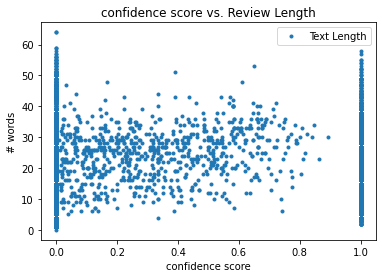

In [93]:
plt.plot(df['confidence score'], df['n_words'], '.', label='Text Length')

plt.xlabel('confidence score')
plt.ylabel('# words')
plt.title("confidence score vs. Review Length")
plt.legend()

To train supervised ML classifiers for ternary classification, **we use very-high and high confidence groups of positive and negative predictions as training data.**

In [28]:
X_train = df[df['confidence score']>0.5].tweet.values
y_train = df[df['confidence score']>0.5].vader_result.values
X_test = df[~(df['confidence score']>0.5)].tweet.values
y_test = df[~(df['confidence score']>0.5)].vader_result.values

In [129]:
# Create a function to tokenize the input for encoder 
# Load bert tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
def preprocessing_for_bert(X, y, batch_size = 32):
    input_ids = []
    attention_masks = []
    
    for sent in X:
        encoded_sent = tokenizer.encode_plus(
            text=sent,  
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=280,                  # maximum twitter lenght 280
            pad_to_max_length=True,         
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True,      
            truncation=True
            )
        
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
     
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    
    labels = torch.tensor(y)
    # convert the tensors into a PyTorch Dataset=
    data = TensorDataset(input_ids, attention_masks, labels)
    sampler = RandomSampler(data)
    # feed dataset to training loop
    dataloader = DataLoader(data, # The training samples.
                            sampler=sampler,   # Select batches randomly
                            batch_size=batch_size)
    
    return dataloader

In [130]:
train_dataloader  = preprocessing_for_bert(X_train, y_train, batch_size = 32)
test_dataloader  = preprocessing_for_bert(X_test, y_test, batch_size = 32)

In [131]:
# create the tensor dataset based on differnet confidence score
def subset(lower,higher):
    X = df[(df['confidence score']>lower)&(df['confidence score']<=higher)].tweet.values
    y = df[(df['confidence score']>lower)&(df['confidence score']<=higher)].vader_result.values
    return preprocessing_for_bert(X, y, batch_size = 32)

In [132]:
vh_dataloader = subset(lower=0.75,higher=1)
h_dataloader = subset(lower=0.55,higher=0.75)
l_dataloader = subset(lower=0.38,higher=0.55)
vl_dataloader = subset(lower=0, higher=0.38)

### 3. model training


#### 3.1 create BertClassifier

In [51]:
def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    bert_classifier = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

#     #Tell PyTorch to run the model on GPU
#     bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),lr=0.001,eps=1e-8)

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs
    
    # Warm up steps is a parameter which is used to lower the learning rate in order to reduce the impact of deviating the model from learning on sudden new data set exposure.

    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=50, 
                                                num_training_steps=total_steps)
    
    return bert_classifier, optimizer, scheduler

In [173]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)
        
def kappa_score(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return cohen_kappa_score(preds_flat,labels_flat, labels=None, weights=None)

In [ ]:
def other_metrics(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    f1_score = f1_score(labels_flat, preds_flat, average='weighted')
    kappa_score = cohen_kappa_score(preds_flat,labels_flat, labels=None, weights=None)
    print(" F1 Score: {0:.2f}".format(f1_score))
    print(" Kappa Score: {0:.2f}".format(kappa_score))

#### 3.3 Training Loop

In [185]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

def train(model, train_dataloader, epochs):
    """
    Train the BertClassifier model
    """
    train_loss_set = []
    print("Start training...\n")
    
    # We'll store a number of quantities such as training and validation loss, 
    # validation accuracy, and timings.
    training_stats = []
    
    # Measure the total training time for the whole run.
    total_t0 = time.time()
    
    # For each epoch...
    for epoch_i in range(0, epochs):
        print("")
        print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
        print('Training...')
        
        t0 = time.time()  # Measure how long the training epoch takes.
        total_train_loss = 0  # Reset the total loss for this epoch.
        model.train()
        
        for step, batch in enumerate(train_dataloader):
            if step % 40 == 0 and not step == 0:
                # Calculate elapsed time in minutes.
                elapsed = format_time(time.time() - t0)
                print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
            
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)
            
            model.zero_grad()   
            
            output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
            loss = output.loss
            logits = output.logits
            
            total_train_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()
            # Calculate the average loss over all of the batches.
        
        avg_train_loss = total_train_loss / len(train_dataloader) 
        training_time = format_time(time.time() - t0)
        print("")
        print("  Average training loss: {0:.2f}".format(avg_train_loss))
        print("  Training epcoh took: {:}".format(training_time))

In [ ]:
train(bert_classifier, train_dataloader, epochs=1)

Start training...


======== Epoch 1 / 1 ========
Training...
  Batch    40  of     59.    Elapsed: 0:37:17.


In [ ]:
def evaluate(model, val_dataloader):
    print("")
    print("Running Validation...")
    t0 = time.time()
    model.eval()
    
    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # For each batch in our validation set...
    for batch in val_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():
            output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)


        total_eval_loss += loss.item()
        
         # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy() # prediction
        label_ids = b_labels.to('cpu').numpy() # true label
        
        total_eval_accuracy += flat_accuracy(logits, label_ids)

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)
        
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print(" Loss: {0:.2f}".format(avg_val_loss))
    print(" Validation took: {:}".format(validation_time))
    return logits, label_ids 

In [79]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    
    
def train(model, train_dataloader, val_dataloader, epochs):
    """
    Train the BertClassifier model
    """train_loss_set = []
    print("Start training...\n")
    
    
    for epoch in range(epochs):
#         # training, Print the header of the result table
#         print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
#         print("-"*70)

#         # Measure the elapsed time of each epoch
#         t0_epoch, t0_batch = time.time(), time.time()

        # Reset at the beginning of each epoch
        train_loss, batch_loss, batch_counts = 0, 0, 0
        # Put the model into the training mode
        model.train()

        # For each batch of training data in each epoch
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'labels':         batch[2],
                 }       

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            outputs = model(**inputs)

            # Compute loss and accumulate the loss values
            loss = outputs[0]
            train_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

        # Calculate the average loss over the entire training data
        avg_train_loss = train_loss / len(train_dataloader)

        print(f'\nEpoch {epoch}')
        print(f'Training loss: {avg_train_loss}')
        
        
        # After the completion of each training epoch, measure the model's performance on val set
        val_loss, predictions, true_vals = evaluate(model, val_dataloader)
        # Print performance over the entire training data
        val_f1 = f1_score_func(predictions, true_vals)
       
        print(f'Validation loss: {val_loss}')
        print(f'F1 Score (Weighted): {val_f1}')
    
    print("Training complete")

In [ ]:
def evaluate(model, val_dataloader):

    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
def evaluate(model,dataloader):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [80]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [82]:
train(bert_classifier, train_dataloader, train_dataloader, epochs=5)

Start training...


Epoch 0
Training loss: 0.5912774710331933
Validation loss: 0.5848461682513609
F1 Score (Weighted): 0.6649717999146714

Epoch 1
Training loss: 0.5762562077429335
Validation loss: 0.5813379792843835
F1 Score (Weighted): 0.6649717999146714

Epoch 2
Training loss: 0.5746599754034463
Validation loss: 0.5774129235138328
F1 Score (Weighted): 0.6649717999146714

Epoch 3
Training loss: 0.5730408662456578
Validation loss: 0.5791670280998036
F1 Score (Weighted): 0.6649717999146714

Epoch 4
Training loss: 0.5726066979311281
Validation loss: 0.5756588214534825
F1 Score (Weighted): 0.6649717999146714
Training complete


In [126]:
vh_loss, vh_predictions, vh_true_vals = evaluate(bert_classifier, vh_dataloader)

In [133]:
f1_score_func(vh_predictions, vh_true_vals)

0.662318532469775

In [177]:
flat_accuracy(vl_predictions, vl_true_vals)

0.5164113785557987

In [171]:
np.argmax(h_predictions, axis=1).flatten()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [170]:
np.argmax(vh_predictions, axis=1).flatten()

array([2, 2, 2, ..., 2, 2, 2])

In [151]:
vh_predictions.flatten()

array([ 0.37555557, -2.9928484 ,  1.8808966 , ...,  0.37555557,
       -2.9928482 ,  1.8808966 ], dtype=float32)

In [153]:
np.argmax(vh_predictions, axis=1)

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
np.argmax(vh_predictions, axis=1).flatten()

In [156]:
h_loss, h_predictions, h_true_vals = evaluate(bert_classifier, h_dataloader)
f1_score_func(h_predictions, h_true_vals)

0.7196992381142496

In [168]:
h_predictions

array([[ 0.3755556 , -2.9928482 ,  1.8808966 ],
       [ 0.37555563, -2.9928484 ,  1.8808967 ],
       [ 0.37555557, -2.9928484 ,  1.8808967 ],
       [ 0.37555563, -2.9928484 ,  1.8808968 ],
       [ 0.37555552, -2.9928482 ,  1.8808966 ],
       [ 0.37555555, -2.9928484 ,  1.8808966 ],
       [ 0.37555557, -2.9928482 ,  1.8808967 ],
       [ 0.37555557, -2.9928482 ,  1.8808966 ],
       [ 0.37555557, -2.9928484 ,  1.8808966 ],
       [ 0.37555557, -2.9928484 ,  1.8808967 ],
       [ 0.37555563, -2.9928482 ,  1.8808967 ],
       [ 0.37555555, -2.9928482 ,  1.8808966 ],
       [ 0.37555557, -2.9928482 ,  1.8808966 ],
       [ 0.37555555, -2.9928482 ,  1.8808966 ],
       [ 0.3755556 , -2.9928484 ,  1.8808966 ],
       [ 0.37555557, -2.9928482 ,  1.8808966 ],
       [ 0.37555566, -2.9928482 ,  1.8808968 ],
       [ 0.37555557, -2.9928484 ,  1.8808966 ],
       [ 0.37555552, -2.9928482 ,  1.8808966 ],
       [ 0.37555555, -2.9928482 ,  1.8808967 ],
       [ 0.37555555, -2.9928482 ,  1.880

In [167]:
classification_report(h_predictions, h_true_vals)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [158]:
l_loss, l_predictions, l_true_vals = evaluate(bert_classifier, l_dataloader)
f1_score_func(l_predictions, l_true_vals)

0.5756683129941751

In [166]:
kappa_score(l_predictions, l_true_vals)

0.0

In [159]:
vl_loss, vl_predictions, vl_true_vals = evaluate(bert_classifier, vl_dataloader)
f1_score_func(vl_predictions, vl_true_vals)

0.35172607601491623

In [165]:
kappa_score(vl_predictions, vl_true_vals)

0.0

#### 3.4. Prediction

In [89]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [90]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

In [99]:
def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.6644
Accuracy: 85.29%


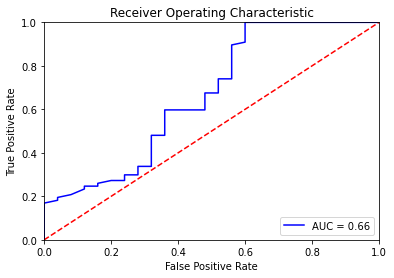

In [100]:
# Evaluate the Bert classifier
evaluate_roc(probs, y_val)

In [101]:
# Concatenate the train set and the validation set
full_train_data = torch.utils.data.ConcatDataset([train_data, val_data])
full_train_sampler = RandomSampler(full_train_data)
full_train_dataloader = DataLoader(full_train_data, sampler=full_train_sampler, batch_size=32)

# Train the Bert Classifier on the entire training data
set_seed(42)
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, full_train_dataloader, epochs=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/swu/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be remov

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.537399   |     -      |     -     |  1326.46 
   1    |   31    |   0.380354   |     -      |     -     |  663.29  
----------------------------------------------------------------------


 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   2    |   20    |   0.340110   |     -      |     -     |  1159.20 
   2    |   31    |   0.337821   |     -      |     -     |  604.80  
----------------------------------------------------------------------


Training complete


In [85]:
output_model = './sentiment.pth'

# save
def save(bert_classifier, optimizer):
    # save
    torch.save({
        'bert_classifier_state_dict': bert_classifier.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, output_model)

save(bert_classifier, optimizer)

In [86]:
# load
checkpoint = torch.load(output_model, map_location='cpu')
bert_classifier.load_state_dict(checkpoint['bert_classifier_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])